# Project Name: Prediction for Credit Card Approval

# Introduction

####  The credit card approval prediction project aims to develop a machine learning model that can accurately assess the likelihood of an individual's credit card application being approved. This involves analyzing various datasets, identifying relevant features, and training models to predict approval outcomes. The project's success will enable financial institutions to streamline their approval processes, minimize risk, and provide more efficient services to their customers.

## Problem Statement

##### The primary objective of this project is to predict the approval or rejection of credit card applications. The challenge lies in understanding the key factors influencing credit card approval decisions and building a predictive model to assist in the decision-making process.

# Importing Basic Libraries

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import warnings
warnings.filterwarnings("ignore")

# Load DataSet

In [2]:
# Loading dataset
data=pd.read_csv("train_data.csv")

In [3]:
data.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


In [4]:
#Last five rows
data.tail(5)

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
29160,5067139,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-23400,365243,1,0,1,1,NaN,1.0,-5.0,0
29161,5029193,F,N,Y,1,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15532,-8256,1,0,0,0,Core staff,3.0,-24.0,0
29162,5047710,F,N,Y,0,76500.0,Working,Secondary / secondary special,Married,House / apartment,-17782,-3291,1,1,1,0,Managers,2.0,-29.0,0
29163,5009886,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21635,365243,1,0,1,0,NaN,2.0,-37.0,0
29164,5062632,F,N,Y,0,585000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18858,-2010,1,0,1,0,NaN,2.0,-43.0,0


# Domain Analysis

1. ID : Unique identifier for each record.
2. Gender : Gender of the applicant.
3. Has a car : Indicates whether the applicant owns a car (binary: 0 or 1).
4. Has a property : Indicates whether the applicant owns a property (binary: 0 or 1).
5. Children count : Number of children the applicant has.
6. Income : Income of the applicant.
7. Employment status : Employment status of the applicant.
8. Education level : Highest education level attained by the applicant.
9. Marital status : Marital status of the applicant.
10. Dwelling : Type of dwelling the applicant resides in.
11. Age : Age of the applicant.
12. Employment length : Duration of the applicant's current employment.
13. Has a mobile phone : Indicates whether the applicant has a mobile phone (binary: 0 or 1).
14. Has a work phone : Indicates whether the applicant has a work phone (binary: 0 or 1).
15. Has a phone : Indicates whether the applicant has any phone (binary: 0 or 1).
16. Has an email : Indicates whether the applicant has an email (binary: 0 or 1).
17. Job title : Title or position of the applicant's job.
18. Family member count : Number of family members.
19. Account age : Age of the applicant's account.
20. Is high risk (Target Variable): Whether the applicant is considered high risk (0 for no, 1 for yes).

# Basic Checks

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

In [6]:
#cheking the dataset columns
data.columns

Index(['ID', 'Gender', 'Has a car', 'Has a property', 'Children count',
       'Income', 'Employment status', 'Education level', 'Marital status',
       'Dwelling', 'Age', 'Employment length', 'Has a mobile phone',
       'Has a work phone', 'Has a phone', 'Has an email', 'Job title',
       'Family member count', 'Account age', 'Is high risk'],
      dtype='object')

In [7]:
#Check the shape of the Data set
print('No. of rows :',data.shape[0])
print('No. of columns',data.shape[1])

No. of rows : 29165
No. of columns 20


In [8]:
#Check for empty elements
nvc = pd.DataFrame(data.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/data.shape[0],3)*100
print(nvc)

                     Total Null Values  Percentage
ID                                   0         0.0
Family member count                  0         0.0
Has an email                         0         0.0
Has a phone                          0         0.0
Has a work phone                     0         0.0
Has a mobile phone                   0         0.0
Employment length                    0         0.0
Age                                  0         0.0
Account age                          0         0.0
Dwelling                             0         0.0
Education level                      0         0.0
Employment status                    0         0.0
Income                               0         0.0
Children count                       0         0.0
Has a property                       0         0.0
Has a car                            0         0.0
Gender                               0         0.0
Marital status                       0         0.0
Is high risk                   

Insights:
- The dataset exhibits a high level of completeness, with most columns containing no missing values. However, it is noteworthy that the "Job title" column stands out with a considerable number of missing values, specifically 9027 instances, representing 31.0% of the data in that column. 

# Handling the Null value

In [9]:
# Impute categorical 'Job title ' with mode
data['Job title'].fillna(data['Job title'].mode()[0], inplace=True)

In [10]:
data['Job title'].fillna('Unknown', inplace=True)

In [11]:
data.isnull().sum()

ID                     0
Gender                 0
Has a car              0
Has a property         0
Children count         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Age                    0
Employment length      0
Has a mobile phone     0
Has a work phone       0
Has a phone            0
Has an email           0
Job title              0
Family member count    0
Account age            0
Is high risk           0
dtype: int64

Insights

- understanding the potential reasons behind the high number of missing values in the "Job title" column is crucial for ensuring the accuracy and completeness of the dataset

In [12]:
#Taking care of duplicate values
data_dup = data.duplicated().any()

In [13]:
data_dup

False

Insights:
- Dataset have no duplicate values

# Statistical information about the data

In [14]:
# Getting insights of numerical values
data.describe()

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,2.916500e+04,29165.000000,2.916500e+04,29165.000000,29165.000000,29165.0,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000
mean,5.078232e+06,0.430790,1.868904e+05,-15979.477490,59257.761255,1.0,0.224310,0.294977,0.090279,2.197531,-26.137734,0.017110
std,4.182400e+04,0.741882,1.014096e+05,4202.997485,137655.883458,0.0,0.417134,0.456040,0.286587,0.912189,16.486702,0.129682
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042047e+06,0.000000,1.215000e+05,-19444.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074666e+06,0.000000,1.575000e+05,-15565.000000,-1557.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.114629e+06,1.000000,2.250000e+05,-12475.000000,-412.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150485e+06,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

# Numerical Features

In [16]:
num_data = data[['ID','Children count','Income','Age','Employment length','Has a mobile phone','Has a work phone','Has a phone',
             'Has an email','Family member count','Account age','Is high risk']]
num_data

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
0,5037048,0,135000.0,-16271,-3111,1,0,0,0,2.0,-17.0,0
1,5044630,1,135000.0,-10130,-1651,1,0,0,0,2.0,-1.0,0
2,5079079,2,180000.0,-12821,-5657,1,0,0,0,4.0,-38.0,0
3,5112872,0,360000.0,-20929,-2046,1,0,0,1,1.0,-11.0,0
4,5105858,0,270000.0,-16207,-515,1,0,1,0,1.0,-41.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29160,5067139,0,112500.0,-23400,365243,1,0,1,1,1.0,-5.0,0
29161,5029193,1,135000.0,-15532,-8256,1,0,0,0,3.0,-24.0,0
29162,5047710,0,76500.0,-17782,-3291,1,1,1,0,2.0,-29.0,0
29163,5009886,0,157500.0,-21635,365243,1,0,1,0,2.0,-37.0,0


# Checking For Normal Distribution

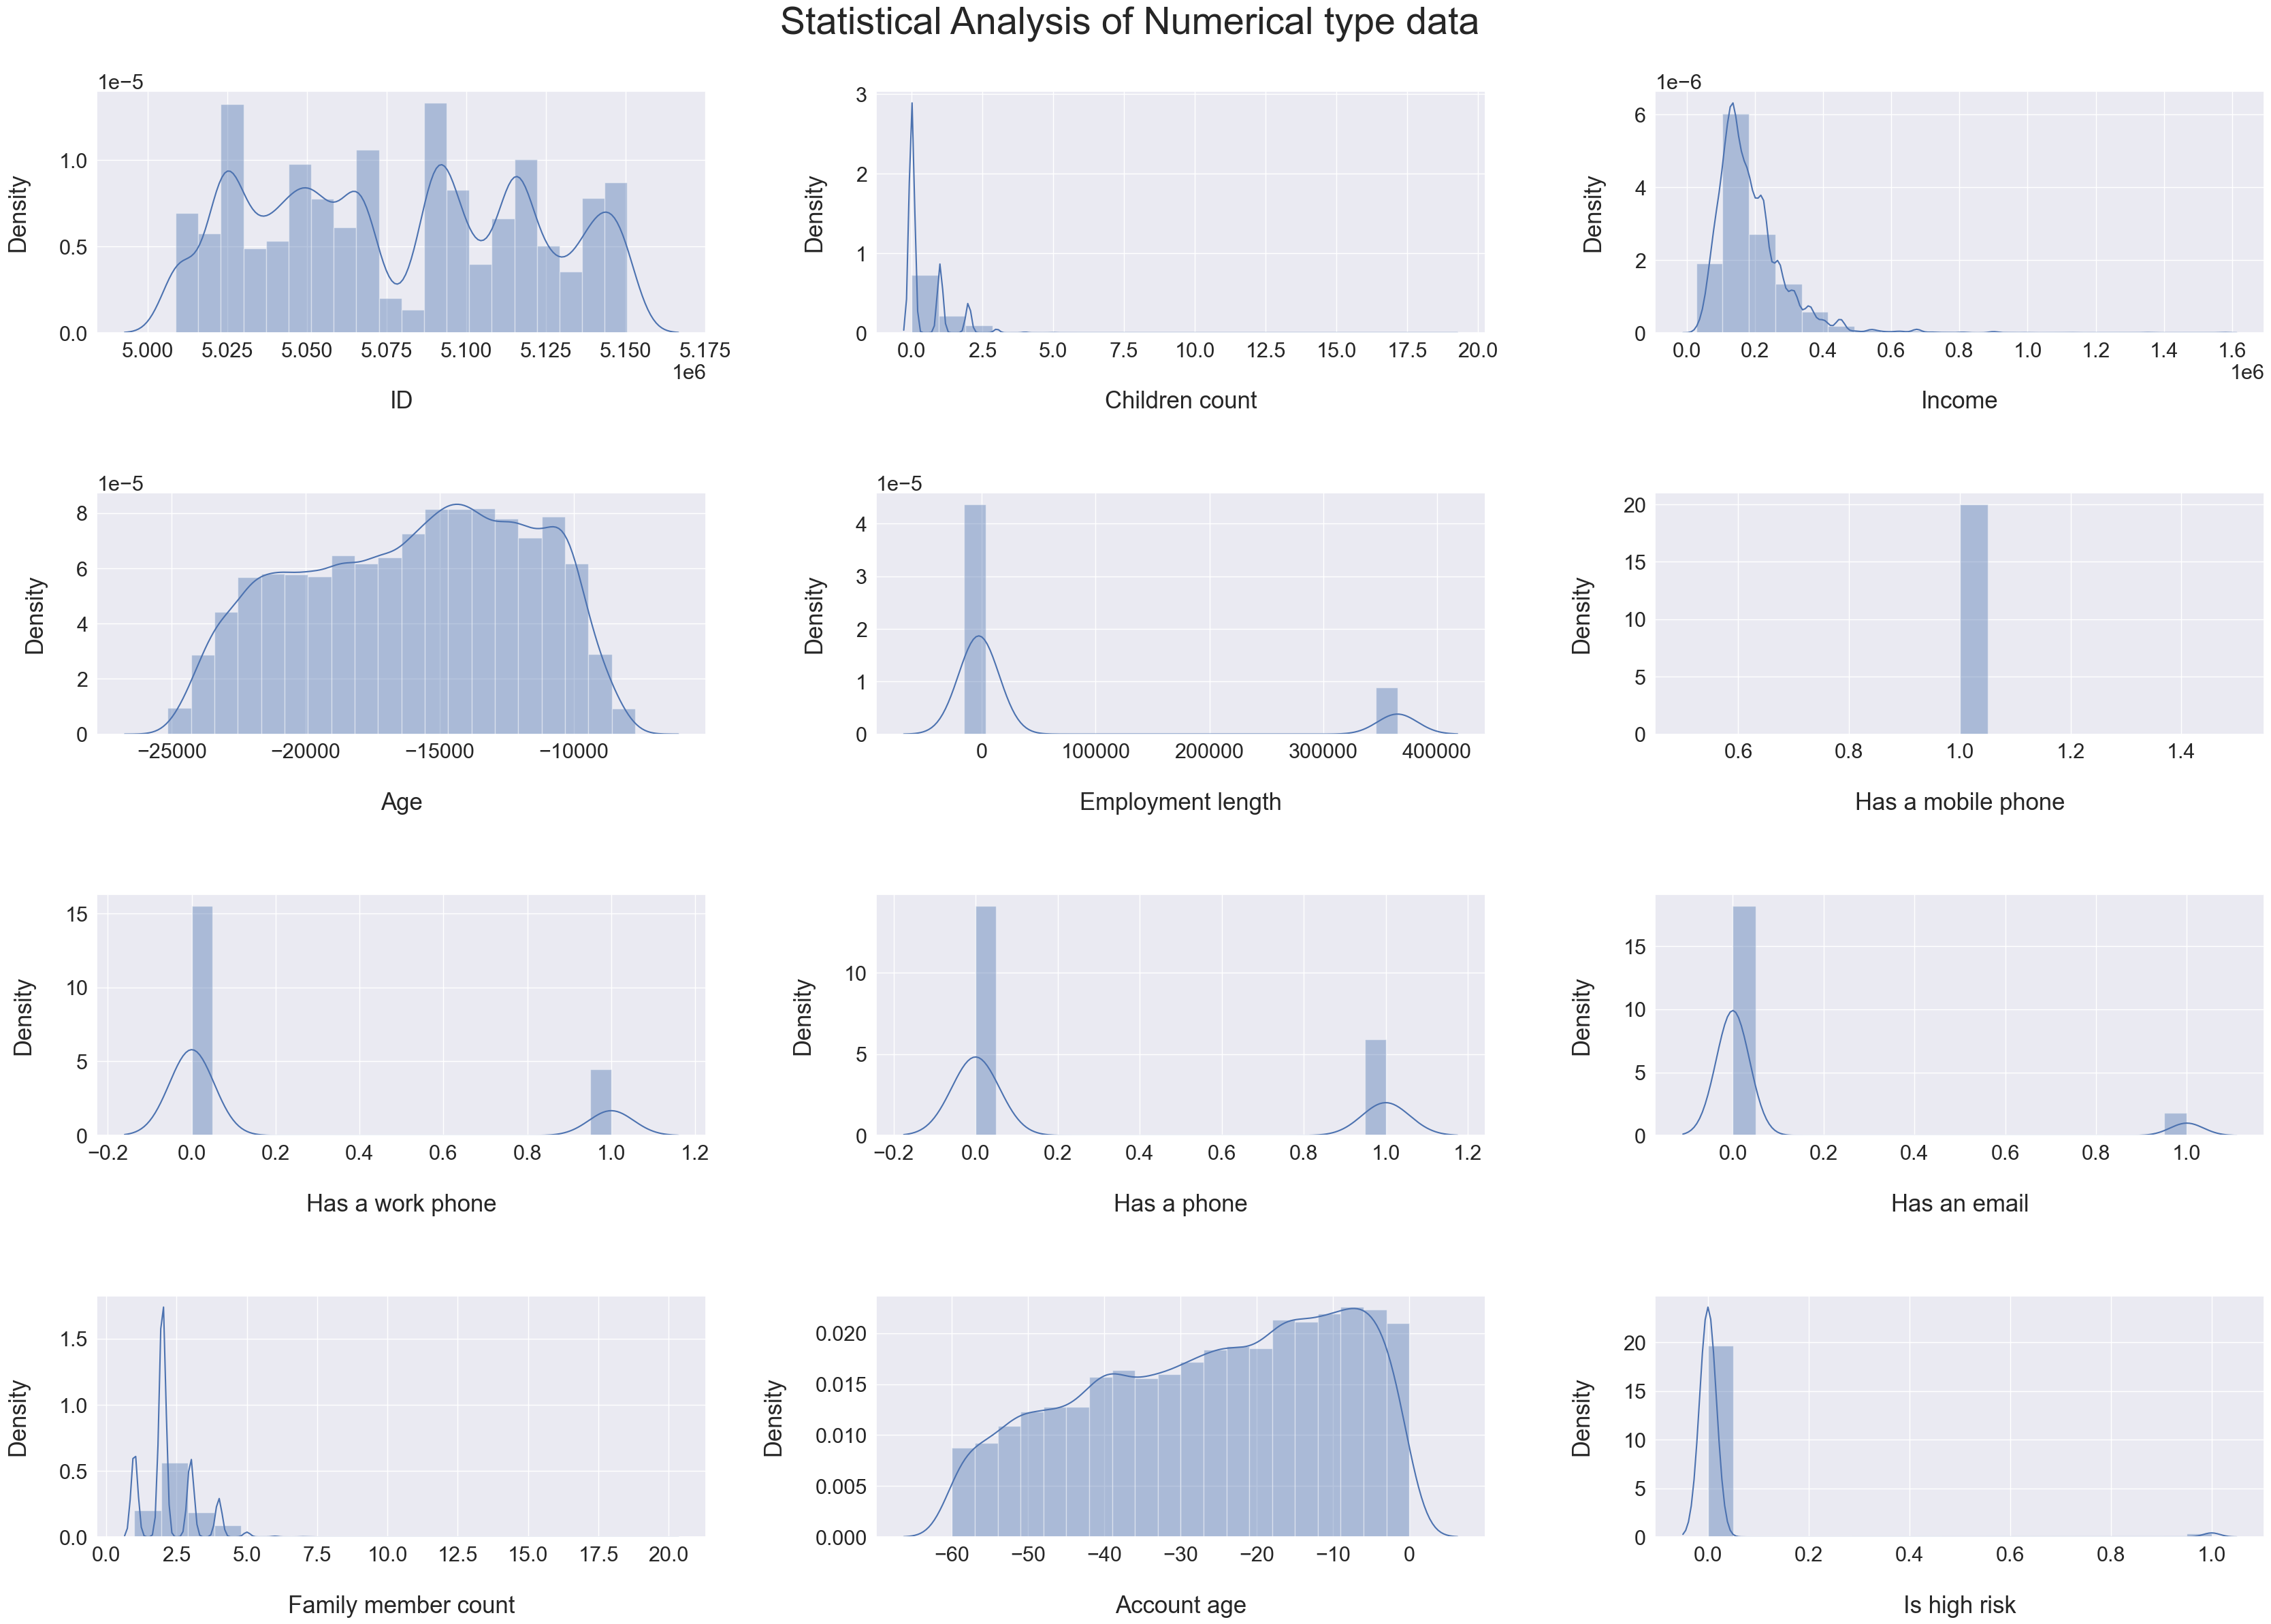

In [17]:
sns.set(rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":22,"xtick.labelsize":22,"ytick.labelsize":22,
            "legend.fontsize":12})

fig = plt.figure(figsize=(35,25))
fig.suptitle("Statistical Analysis of Numerical type data", fontsize=40)
for index,col in enumerate(num_data):
    plt.subplot(4,3,index+1)
    sns.distplot(num_data.loc[:,col].dropna(),kde=True,bins=20)
    plt.xlabel(f"\n{col}",fontsize=25)
    plt.ylabel("Density\n",fontsize=25)
fig.tight_layout(pad=4.0)
fig.subplots_adjust(top=0.93)

# checking  skewness

In [18]:
# Defining a function for checking  skewness
from scipy.stats import skew, kurtosis
def skewedness(data):
    skewed=[]
    for col in data:
        sk=data[col].skew()
        if(sk>=1.96 or sk<=-1.96):
            skewed.append(col)
    return skewed
print(f"\033[1mSkewed Column name : {skewedness(num_data)}")
print('\033[1mRange of skewness & kurtosis, S < |1.96|')

Skewed Column name : ['Children count', 'Income', 'Has an email', 'Is high risk']
Range of skewness & kurtosis, S < |1.96|


### Children count

In [19]:
# Checking how much Skewness & Kurtosis
print('\033[1mSkewness for Children count:',skew(data['Children count']))
print('\033[1mKurtosis for Children count:',kurtosis(data['Children count']))

Skewness for Children count: 2.592829081531687
Kurtosis for Children count: 23.794486036428196


Insight:
- The ' Children Count ' variable exhibits a positive skewness, indicating that the distribution is skewed to the right. The high positive kurtosis suggests heavy tails and a more peaked distribution, possibly containing outliers.

### Income

In [20]:
print('\033[1mSkewness for Income:',skew(data['Income']))
print('\033[1mKurtosis for Income:',kurtosis(data['Income']))

Skewness for Income: 2.75697355249967
Kurtosis for Income: 18.285804159406073


Insight: 
- The 'Income' variable also shows positive skewness, suggesting a right-skewed distribution. The high kurtosis indicates heavy tails, potentially caused by extreme values or outliers.

### Has an email

In [21]:
print('\033[1mSkewness for Has an email:',skew(data['Has an email']))
print('\033[1mKurtosis for Has an email:',kurtosis(data['Has an email']))

Skewness for Has an email: 2.8593630806842176
Kurtosis for Has an email: 6.175957227179939


Insight: 
- The ' Has an Email ' variable is positively skewed, indicating that the majority of the data may be concentrated on the lower side. The kurtosis value, though elevated, is not as extreme as the previous variables.

### Is high risk

In [22]:
print('\033[1mSkewness for Is high risk:',skew(data['Is high risk']))
print('\033[1mKurtosis for Is high riskl:',kurtosis(data['Is high risk']))

Skewness for Is high risk: 7.447435878820458
Kurtosis for Is high riskl: 53.46430116914219


Insight:
- The ' Is High Risk ' variable shows a very high positive skewness, suggesting a heavily right-skewed distribution. The extremely high kurtosis indicates significant tails and potential outliers. This variable may need special attention due to its pronounced departure from a normal distribution.

# Square root transformation method for reducing skewness

In [23]:
# applying square root to the skewed column twice

num_data['Children count'] = np.sqrt(num_data['Children count'])
num_data['Children count'] = np.sqrt(num_data['Children count'])

In [24]:
num_data['Income'] = np.sqrt(num_data['Income'])
num_data['Income'] = np.sqrt(num_data['Income'])

In [25]:
num_data['Has an email'] = np.sqrt(num_data['Has an email'])
num_data['Has an email'] = np.sqrt(num_data['Has an email'])

In [26]:
num_data['Is high risk'] = np.sqrt(num_data['Is high risk'])
num_data['Is high risk'] = np.sqrt(num_data['Is high risk'])

### Check for skewness of the data

In [27]:
num_data['Children count'].skew()

0.8723948741736631

In [28]:
num_data['Income'].skew()

0.5494964828350609

In [29]:
num_data['Has an email'].skew()

2.8595101517113997

In [30]:
num_data['Is high risk'].skew()

7.447818936869981

In [127]:
from prettytable import PrettyTable
pt = PrettyTable()
pt.field_names = ['Column Name','Skewness of the data']
pt.add_row(['Children count','0.8723'])
pt.add_row(['Income','0.5494'])
pt.add_row(['Has an email','2.8595'])
pt.add_row(['Is high risk','7.4478'])
print(pt)

+----------------+----------------------+
|  Column Name   | Skewness of the data |
+----------------+----------------------+
| Children count |        0.8723        |
|     Income     |        0.5494        |
|  Has an email  |        2.8595        |
|  Is high risk  |        7.4478        |
+----------------+----------------------+


Insights:

- The square root transformation has been successful in reducing skewness and creating more symmetric distributions for 'Children count' and 'Income.'




- The deature 'Has an email' and 'Is high risk' contains only 0 and 1 values. So the square root method won't work on these features.


- However, for 'Has an email' and 'Is high risk,' the transformation has limited impact on skewness, and these variables might still require further transformation or handling of outliers.

## Figure Size Of After operation on Skewed Data

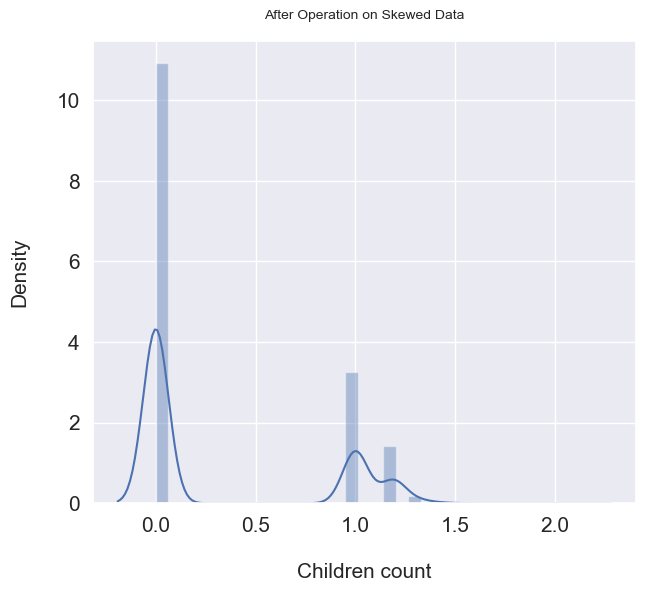

In [31]:
# Set figure size for the notebook
sns.set(rc={"font.size":15,"axes.titlesize":17,"axes.labelsize":15,"xtick.labelsize":15,"ytick.labelsize":15,
            "legend.fontsize":10})
plt.figure(figsize=(7,6))
sns.distplot(num_data['Children count'])
plt.xlabel("\nChildren count")
plt.ylabel("Density\n")
plt.title("After Operation on Skewed Data\n",fontsize=10)
plt.show()

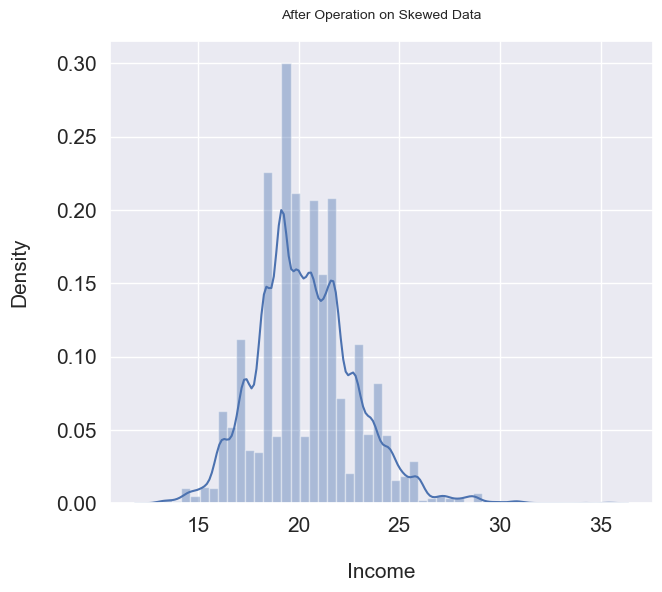

In [32]:
sns.set(rc={"font.size":15,"axes.titlesize":17,"axes.labelsize":15,"xtick.labelsize":15,"ytick.labelsize":15,
            "legend.fontsize":10})
plt.figure(figsize=(7,6))
sns.distplot(num_data['Income'])
plt.xlabel("\nIncome")
plt.ylabel("Density\n")
plt.title("After Operation on Skewed Data\n",fontsize=10)
plt.show()

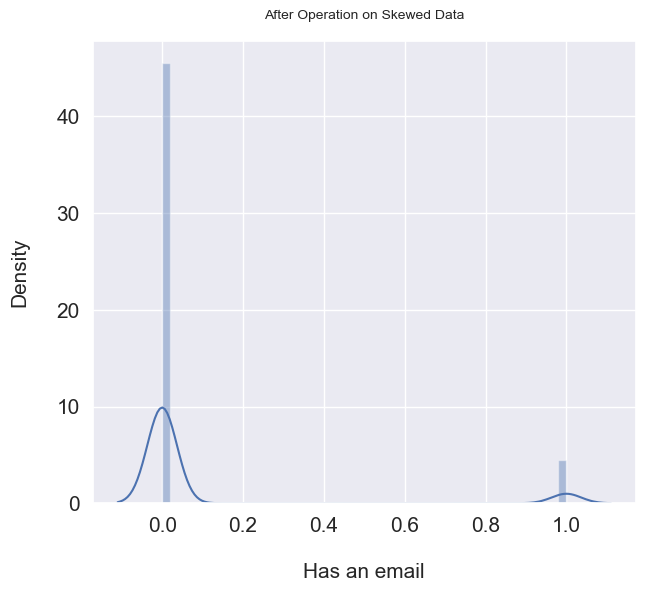

In [33]:
sns.set(rc={"font.size":15,"axes.titlesize":17,"axes.labelsize":15,"xtick.labelsize":15,"ytick.labelsize":15,
            "legend.fontsize":10})
plt.figure(figsize=(7,6))
sns.distplot(num_data['Has an email'])
plt.xlabel("\nHas an email")
plt.ylabel("Density\n")
plt.title("After Operation on Skewed Data\n",fontsize=10)
plt.show()

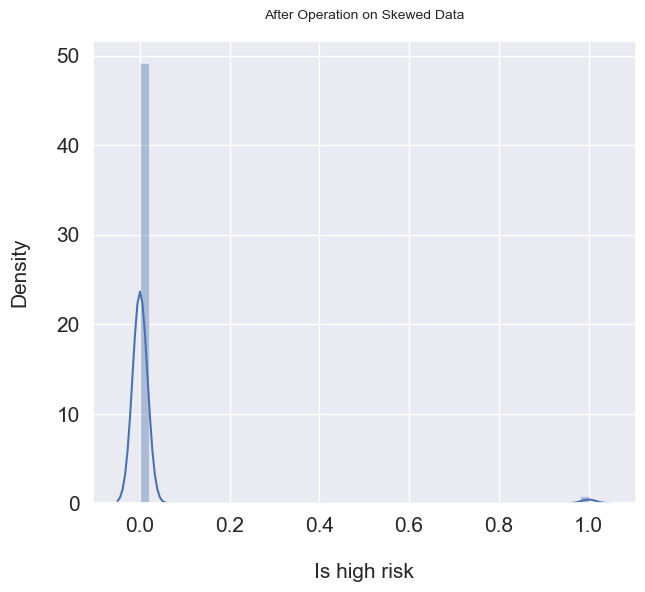

In [34]:
sns.set(rc={"font.size":15,"axes.titlesize":17,"axes.labelsize":15,"xtick.labelsize":15,"ytick.labelsize":15,
            "legend.fontsize":10})
plt.figure(figsize=(7,6))
sns.distplot(num_data['Is high risk'])
plt.xlabel("\nIs high risk")
plt.ylabel("Density\n")
plt.title("After Operation on Skewed Data\n",fontsize=10)
plt.show()

# Categorical Features

In [35]:
# storing object type data in obj_data variable
obj_data = data.select_dtypes(include="object")
obj_data

,Gender,Has a car,Has a property,Employment status,Education level,Marital status,Dwelling,Job title
0,M,Y,Y,Working,Secondary / secondary special,Married,With parents,Core staff
1,F,Y,N,Commercial associate,Higher education,Single / not married,House / apartment,Accountants
2,F,N,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers
3,F,Y,Y,Commercial associate,Higher education,Single / not married,House / apartment,Managers
4,F,N,N,Working,Secondary / secondary special,Separated,House / apartment,Laborers
...,...,...,...,...,...,...,...,...
29160,F,N,Y,Pensioner,Secondary / secondary special,Single / not married,House / apartment,Laborers
29161,F,N,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,Core staff
29162,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Managers
29163,F,N,Y,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,Laborers


# Checking for nun/null values

In [36]:
# check for numerical data
num_data.isna().sum()

ID                     0
Children count         0
Income                 0
Age                    0
Employment length      0
Has a mobile phone     0
Has a work phone       0
Has a phone            0
Has an email           0
Family member count    0
Account age            0
Is high risk           0
dtype: int64

In [37]:
# Check for categorical data
obj_data.isna().sum()

Gender               0
Has a car            0
Has a property       0
Employment status    0
Education level      0
Marital status       0
Dwelling             0
Job title            0
dtype: int64

Insights
- In conclusion, the initial examination of the dataset suggests a clean and complete dataset, setting a solid foundation for further in-depth analysis. The insights gained from exploring numerical, ordinal, and categorical data types will contribute to informed decision-making and potential future modeling efforts.

# Checking Outliers

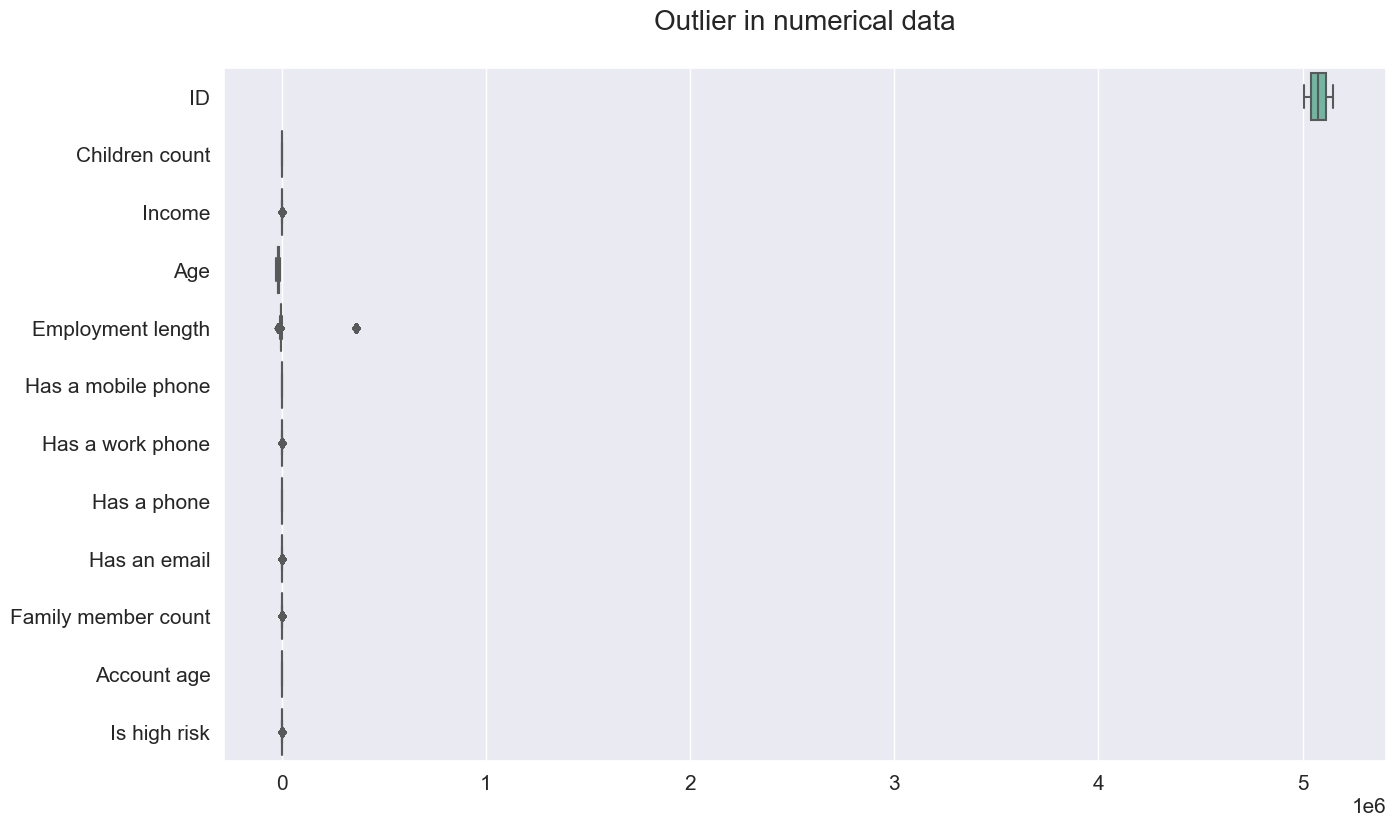

In [38]:
plt.figure(figsize=(15,9))
sns.boxplot(data=num_data, orient="h", palette="Set2")
plt.title("Outlier in numerical data\n",fontsize=20)
plt.show()

# Checking the percentage of the outliers

In [39]:
for i in num_data.columns:
    Q1 = num_data[i].quantile(0.25)
    Q3 = num_data[i].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = num_data[(num_data[i] < lower_bound) | (num_data[i] > upper_bound)]
    percentage = len(outliers) / len(num_data)
    print(i, percentage)

ID 0.0
Children count 0.0
Income 0.015909480541745243
Age 0.0
Employment length 0.217761014915138
Has a mobile phone 0.0
Has a work phone 0.22430996056917538
Has a phone 0.0
Has an email 0.09027944453968799
Family member count 0.012892165266586661
Account age 0.0
Is high risk 0.017109549117092407


Insights:


Here we have outliers less than 5% in 'income' and in 'Family member count' only. Rest of the features have high % of outliers. So we are not handling them

##### These columns are having outliers




- Income
- Family member count


# Handling the outliers

### 1. Income

In [40]:
print(f"\033[1m 25% quantile of Income : {num_data['Income'].quantile(0.25)}")
print(f"\033[1m 75% quantile of Income : {num_data['Income'].quantile(0.75)}")

 25% quantile of Income : 18.66998931865435
 75% quantile of Income : 21.779385873464314


In [41]:
num_data["Income"] = np.where(num_data["Income"] >21, 21,num_data['Income'])
t=skew(num_data["Income"])
print("\033[1m Skewness of Income : {}".format(t))

 Skewness of Income : -1.0827817997985942


In [42]:
num_data["Income"] = np.where(num_data["Income"] <18.0, 18.0,num_data['Income'])
t=skew(num_data["Income"])
print("\033[1m Skewness of Income : {}".format(t))

 Skewness of Income : -0.3958236460399715


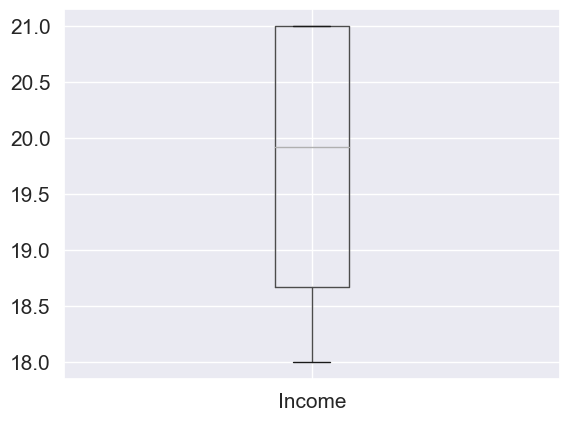

In [43]:
plt.show(num_data.boxplot("Income"))

### 2. Family member count

In [44]:
print(f"\033[1m 25% quantile of Family member count: {num_data['Family member count'].quantile(0.25)}")
print(f"\033[1m 75% quantile of Family member count : {num_data['Family member count'].quantile(0.75)}")

 25% quantile of Family member count: 2.0
 75% quantile of Family member count : 3.0


In [45]:
num_data["Family member count"] = np.where(num_data["Family member count"] >3.0, 3.0,num_data['Family member count'])
t=skew(num_data["Family member count"])
print("\033[1m Skewness of Family member count : {}".format(t))

 Skewness of Family member count : -0.10147113046702799


In [46]:
num_data["Family member count"] = np.where(num_data["Family member count"] <2.0, 2.0,num_data['Family member count'])
t=skew(num_data["Family member count"])
print("\033[1m Skewness of Family member count : {}".format(t))

 Skewness of Family member count : 1.01173490515477


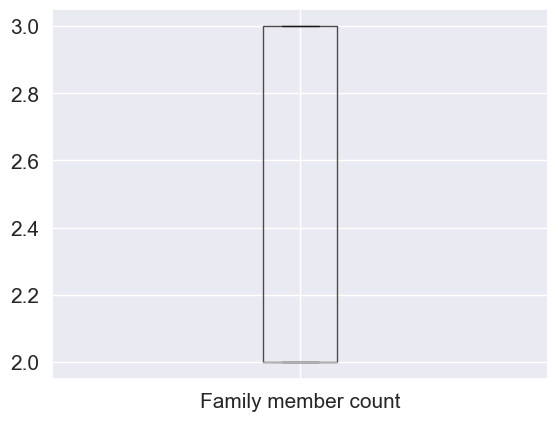

In [47]:
plt.show(num_data.boxplot("Family member count"))

### 3. Is high risk

In [48]:
print(f"\033[1m 25% quantile of Is high risk: {num_data['Is high risk'].quantile(0.25)}")
print(f"\033[1m 75% quantile of Is high risk : {num_data['Is high risk'].quantile(0.75)}")

 25% quantile of Is high risk: 0.0
 75% quantile of Is high risk : 0.0


In [49]:
num_data['Is high risk'].unique()

array([0., 1.])

<Axes: >

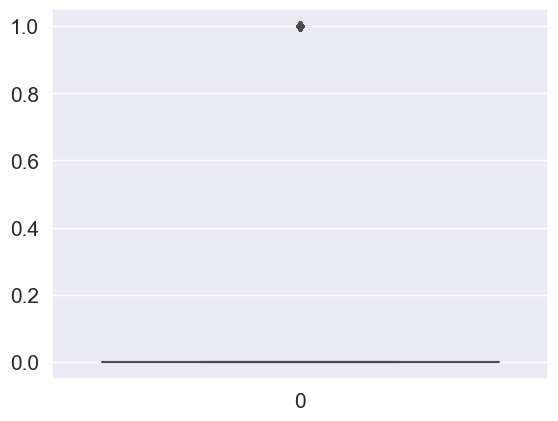

In [50]:
sns.boxplot(num_data['Is high risk'])

Insights:

- There are 1.7% of outliers in "Is high risk" feature. But there are only two unique values which are 0 and 1. and the 1.7% percentage contains the value 1. So if we handle outliers, the feature will have only the value 0 and it will become constant. So we are not handling the outliers in this feature.

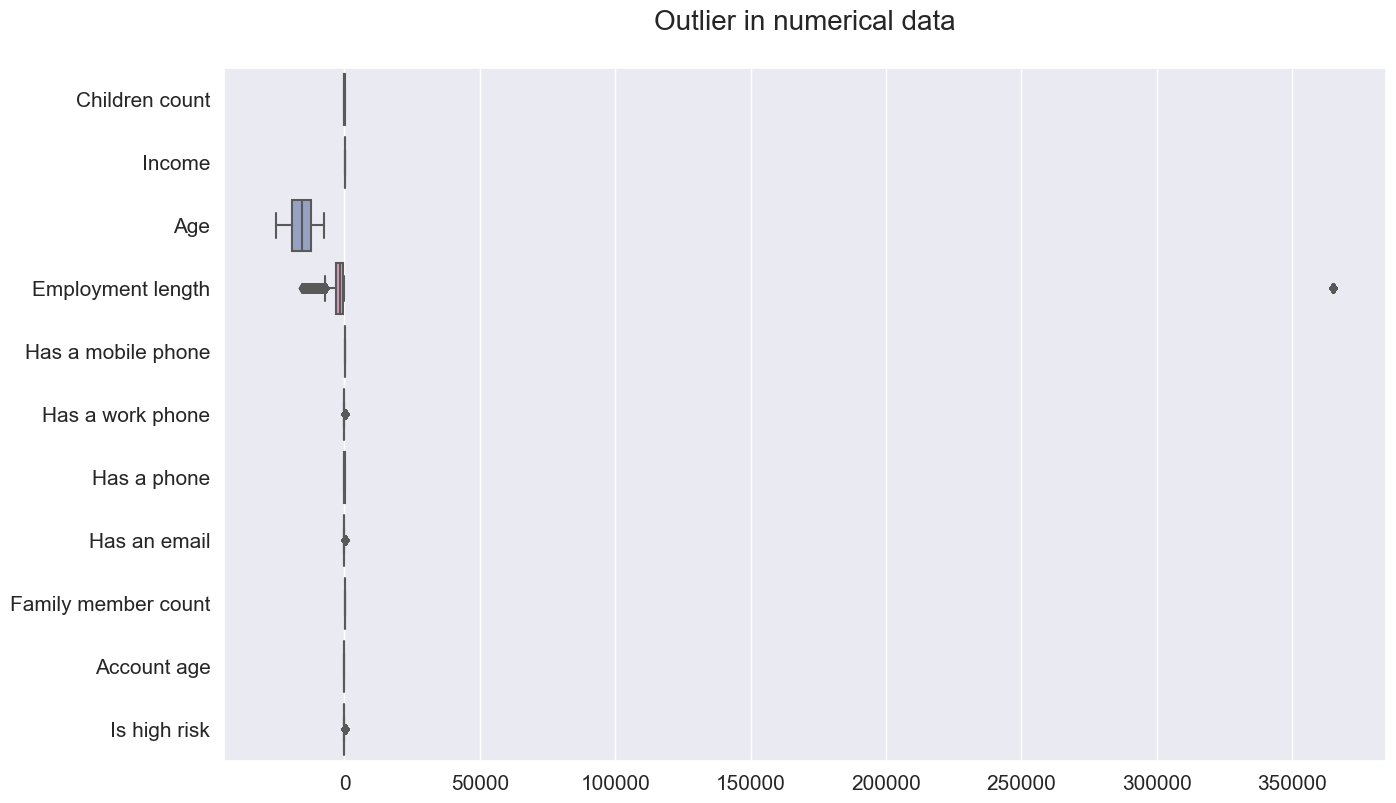

In [51]:
plt.figure(figsize=(15,9))
sns.boxplot(data=num_data.drop(['ID'],axis=1), orient="h", palette="Set2")
plt.title("Outlier in numerical data\n",fontsize=20)
plt.show()

Insights:
   - Here we will removed the outliers of the columns.

# Label Encoding

In [52]:
obj_data = data.select_dtypes(include="object")
obj_data

,Gender,Has a car,Has a property,Employment status,Education level,Marital status,Dwelling,Job title
0,M,Y,Y,Working,Secondary / secondary special,Married,With parents,Core staff
1,F,Y,N,Commercial associate,Higher education,Single / not married,House / apartment,Accountants
2,F,N,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers
3,F,Y,Y,Commercial associate,Higher education,Single / not married,House / apartment,Managers
4,F,N,N,Working,Secondary / secondary special,Separated,House / apartment,Laborers
...,...,...,...,...,...,...,...,...
29160,F,N,Y,Pensioner,Secondary / secondary special,Single / not married,House / apartment,Laborers
29161,F,N,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,Core staff
29162,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Managers
29163,F,N,Y,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,Laborers


In [53]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

label = LabelEncoder()

# Assuming obj_data is your DataFrame
obj_data[['Gender', 'Has a car', 'Has a property', 'Employment status',
          'Education level', 'Marital status', 'Dwelling', 'Job title']] = obj_data[['Gender', 'Has a car', 'Has a property', 'Employment status',
                                                                                        'Education level', 'Marital status', 'Dwelling', 'Job title']].apply(label.fit_transform)

In [54]:
df = pd.concat([num_data, obj_data], axis=1)
df

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk,Gender,Has a car,Has a property,Employment status,Education level,Marital status,Dwelling,Job title
0,5037048,0.000000,19.168293,-16271,-3111,1,0,0,0.0,2.0,-17.0,0.0,1,1,1,4,4,1,5,3
1,5044630,1.000000,19.168293,-10130,-1651,1,0,0,0.0,2.0,-1.0,0.0,0,1,0,0,1,3,1,0
2,5079079,1.189207,20.597671,-12821,-5657,1,0,0,0.0,3.0,-38.0,0.0,0,0,1,0,4,1,1,8
3,5112872,0.000000,21.000000,-20929,-2046,1,0,0,1.0,2.0,-11.0,0.0,0,1,1,0,1,3,1,10
4,5105858,0.000000,21.000000,-16207,-515,1,0,1,0.0,2.0,-41.0,0.0,0,0,0,4,4,2,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29160,5067139,0.000000,18.314208,-23400,365243,1,0,1,1.0,2.0,-5.0,0.0,0,0,1,1,4,3,1,8
29161,5029193,1.000000,19.168293,-15532,-8256,1,0,0,0.0,3.0,-24.0,0.0,0,0,1,0,4,1,1,3
29162,5047710,0.000000,18.000000,-17782,-3291,1,1,1,0.0,2.0,-29.0,0.0,0,0,1,4,4,1,1,10
29163,5009886,0.000000,19.921413,-21635,365243,1,0,1,0.0,2.0,-37.0,0.0,0,0,1,1,4,0,1,8


In [55]:
# defing Independent variables as X
X = df.drop('Is high risk', axis=1)
# Defing Target variable or dependent variable
y = df['Is high risk']

In [56]:
X

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Gender,Has a car,Has a property,Employment status,Education level,Marital status,Dwelling,Job title
0,5037048,0.000000,19.168293,-16271,-3111,1,0,0,0.0,2.0,-17.0,1,1,1,4,4,1,5,3
1,5044630,1.000000,19.168293,-10130,-1651,1,0,0,0.0,2.0,-1.0,0,1,0,0,1,3,1,0
2,5079079,1.189207,20.597671,-12821,-5657,1,0,0,0.0,3.0,-38.0,0,0,1,0,4,1,1,8
3,5112872,0.000000,21.000000,-20929,-2046,1,0,0,1.0,2.0,-11.0,0,1,1,0,1,3,1,10
4,5105858,0.000000,21.000000,-16207,-515,1,0,1,0.0,2.0,-41.0,0,0,0,4,4,2,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29160,5067139,0.000000,18.314208,-23400,365243,1,0,1,1.0,2.0,-5.0,0,0,1,1,4,3,1,8
29161,5029193,1.000000,19.168293,-15532,-8256,1,0,0,0.0,3.0,-24.0,0,0,1,0,4,1,1,3
29162,5047710,0.000000,18.000000,-17782,-3291,1,1,1,0.0,2.0,-29.0,0,0,1,4,4,1,1,10
29163,5009886,0.000000,19.921413,-21635,365243,1,0,1,0.0,2.0,-37.0,0,0,1,1,4,0,1,8


In [57]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
29160    0.0
29161    0.0
29162    0.0
29163    0.0
29164    0.0
Name: Is high risk, Length: 29165, dtype: float64

# Checking for Imbalance data

In [58]:
y.value_counts(normalize=True)*100

Is high risk
0.0    98.289045
1.0     1.710955
Name: proportion, dtype: float64

Insights:
  -  The data is imbalanced. If we continue use this data,it will lead to bias the output.so we have to balance the data.

# Handling Imbalanced data

#### Converting Imbalance data into balanced data

- Balancing data with SMOTE Technique gives more number of NaN values
- so, we use RandomOverSampler Technique to balance the data

In [59]:
# Imports
from imblearn.over_sampling import RandomOverSampler,SMOTENC,SMOTE
# Intilizing the model
oversampling = RandomOverSampler()
X_smote, y_smote = oversampling.fit_resample(X,y)
X_smote = pd.DataFrame(X_smote)
X_smote.columns = ["ID",'Gender', 'Has a car', 'Has a property', 'Children count',
       'Income', 'Employment status', 'Education level', 'Marital status',
       'Dwelling', 'Age', 'Employment length', 'Has a mobile phone',
       'Has a work phone', 'Has a phone', 'Has an email', 'Job title',
       'Family member count', 'Account age', ]
X_smote

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age
0,5037048,0.000000,19.168293,-16271,-3111,1,0,0,0.0,2.0,-17.0,1,1,1,4,4,1,5,3
1,5044630,1.000000,19.168293,-10130,-1651,1,0,0,0.0,2.0,-1.0,0,1,0,0,1,3,1,0
2,5079079,1.189207,20.597671,-12821,-5657,1,0,0,0.0,3.0,-38.0,0,0,1,0,4,1,1,8
3,5112872,0.000000,21.000000,-20929,-2046,1,0,0,1.0,2.0,-11.0,0,1,1,0,1,3,1,10
4,5105858,0.000000,21.000000,-16207,-515,1,0,1,0.0,2.0,-41.0,0,0,0,4,4,2,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57327,5078802,0.000000,21.000000,-18927,-2978,1,0,0,0.0,2.0,-60.0,0,0,1,4,4,1,1,6
57328,5054386,0.000000,21.000000,-14050,-3680,1,1,1,0.0,2.0,-41.0,1,1,0,1,1,3,1,8
57329,5069021,0.000000,21.000000,-20295,-3700,1,0,0,0.0,2.0,-29.0,0,0,1,4,4,1,1,8
57330,5078945,1.189207,20.597671,-12253,-3496,1,1,0,0.0,3.0,-51.0,0,0,1,4,2,2,1,8


In [60]:
data.columns

Index(['ID', 'Gender', 'Has a car', 'Has a property', 'Children count',
       'Income', 'Employment status', 'Education level', 'Marital status',
       'Dwelling', 'Age', 'Employment length', 'Has a mobile phone',
       'Has a work phone', 'Has a phone', 'Has an email', 'Job title',
       'Family member count', 'Account age', 'Is high risk'],
      dtype='object')

In [61]:
y_smote.value_counts(normalize=True)*100

Is high risk
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64

- Now the data is balanced

# EDA (Exploratory Data Anaysis)

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Children count'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Employment length'}>,
        <Axes: title={'center': 'Has a mobile phone'}>],
       [<Axes: title={'center': 'Has a work phone'}>,
        <Axes: title={'center': 'Has a phone'}>,
        <Axes: title={'center': 'Has an email'}>],
       [<Axes: title={'center': 'Family member count'}>,
        <Axes: title={'center': 'Account age'}>, <Axes: >]], dtype=object)

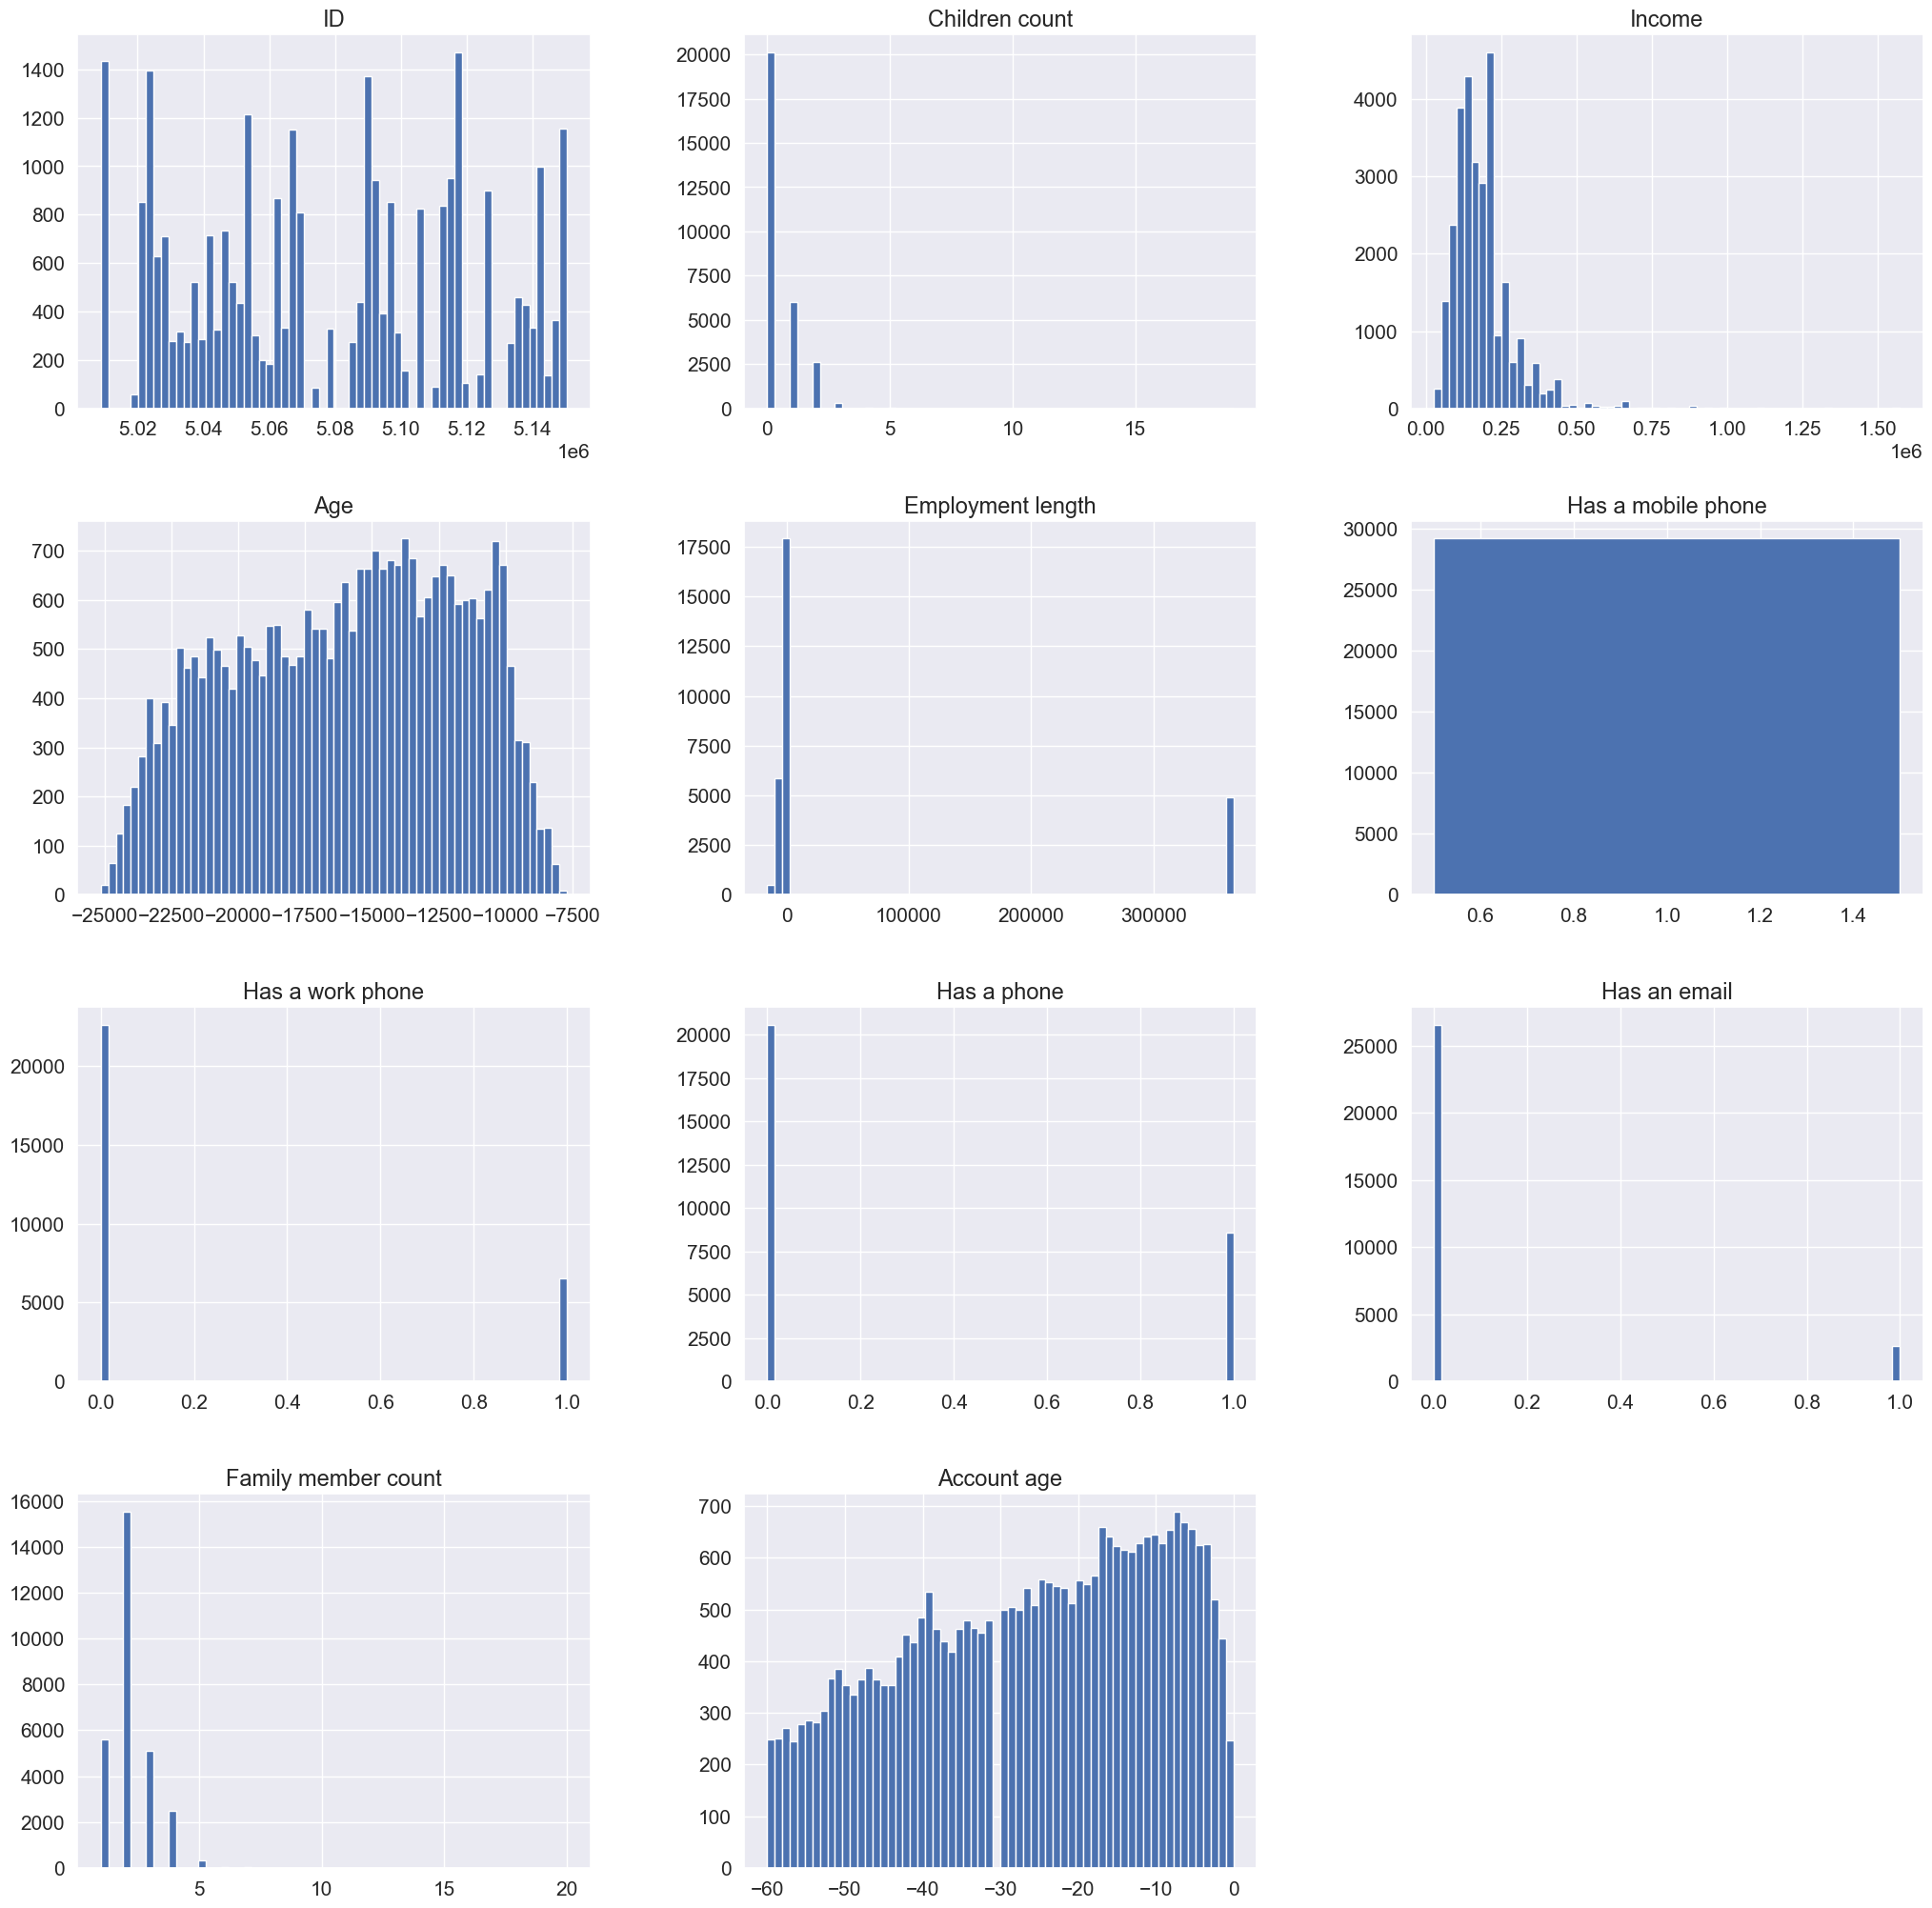

In [62]:
# Create histograms for the numerical features in the df DataFrame
data.hist(column= ['ID','Children count','Income','Age','Employment length','Has a mobile phone',
        'Has a work phone','Has a phone','Has an email','Family member count','Account age'], figsize=(25, 25), bins='rice')

Insights:

- "Children count, Income, Family member count" these features are skewed.
- In the "Has a mobile phone" feature have only one values


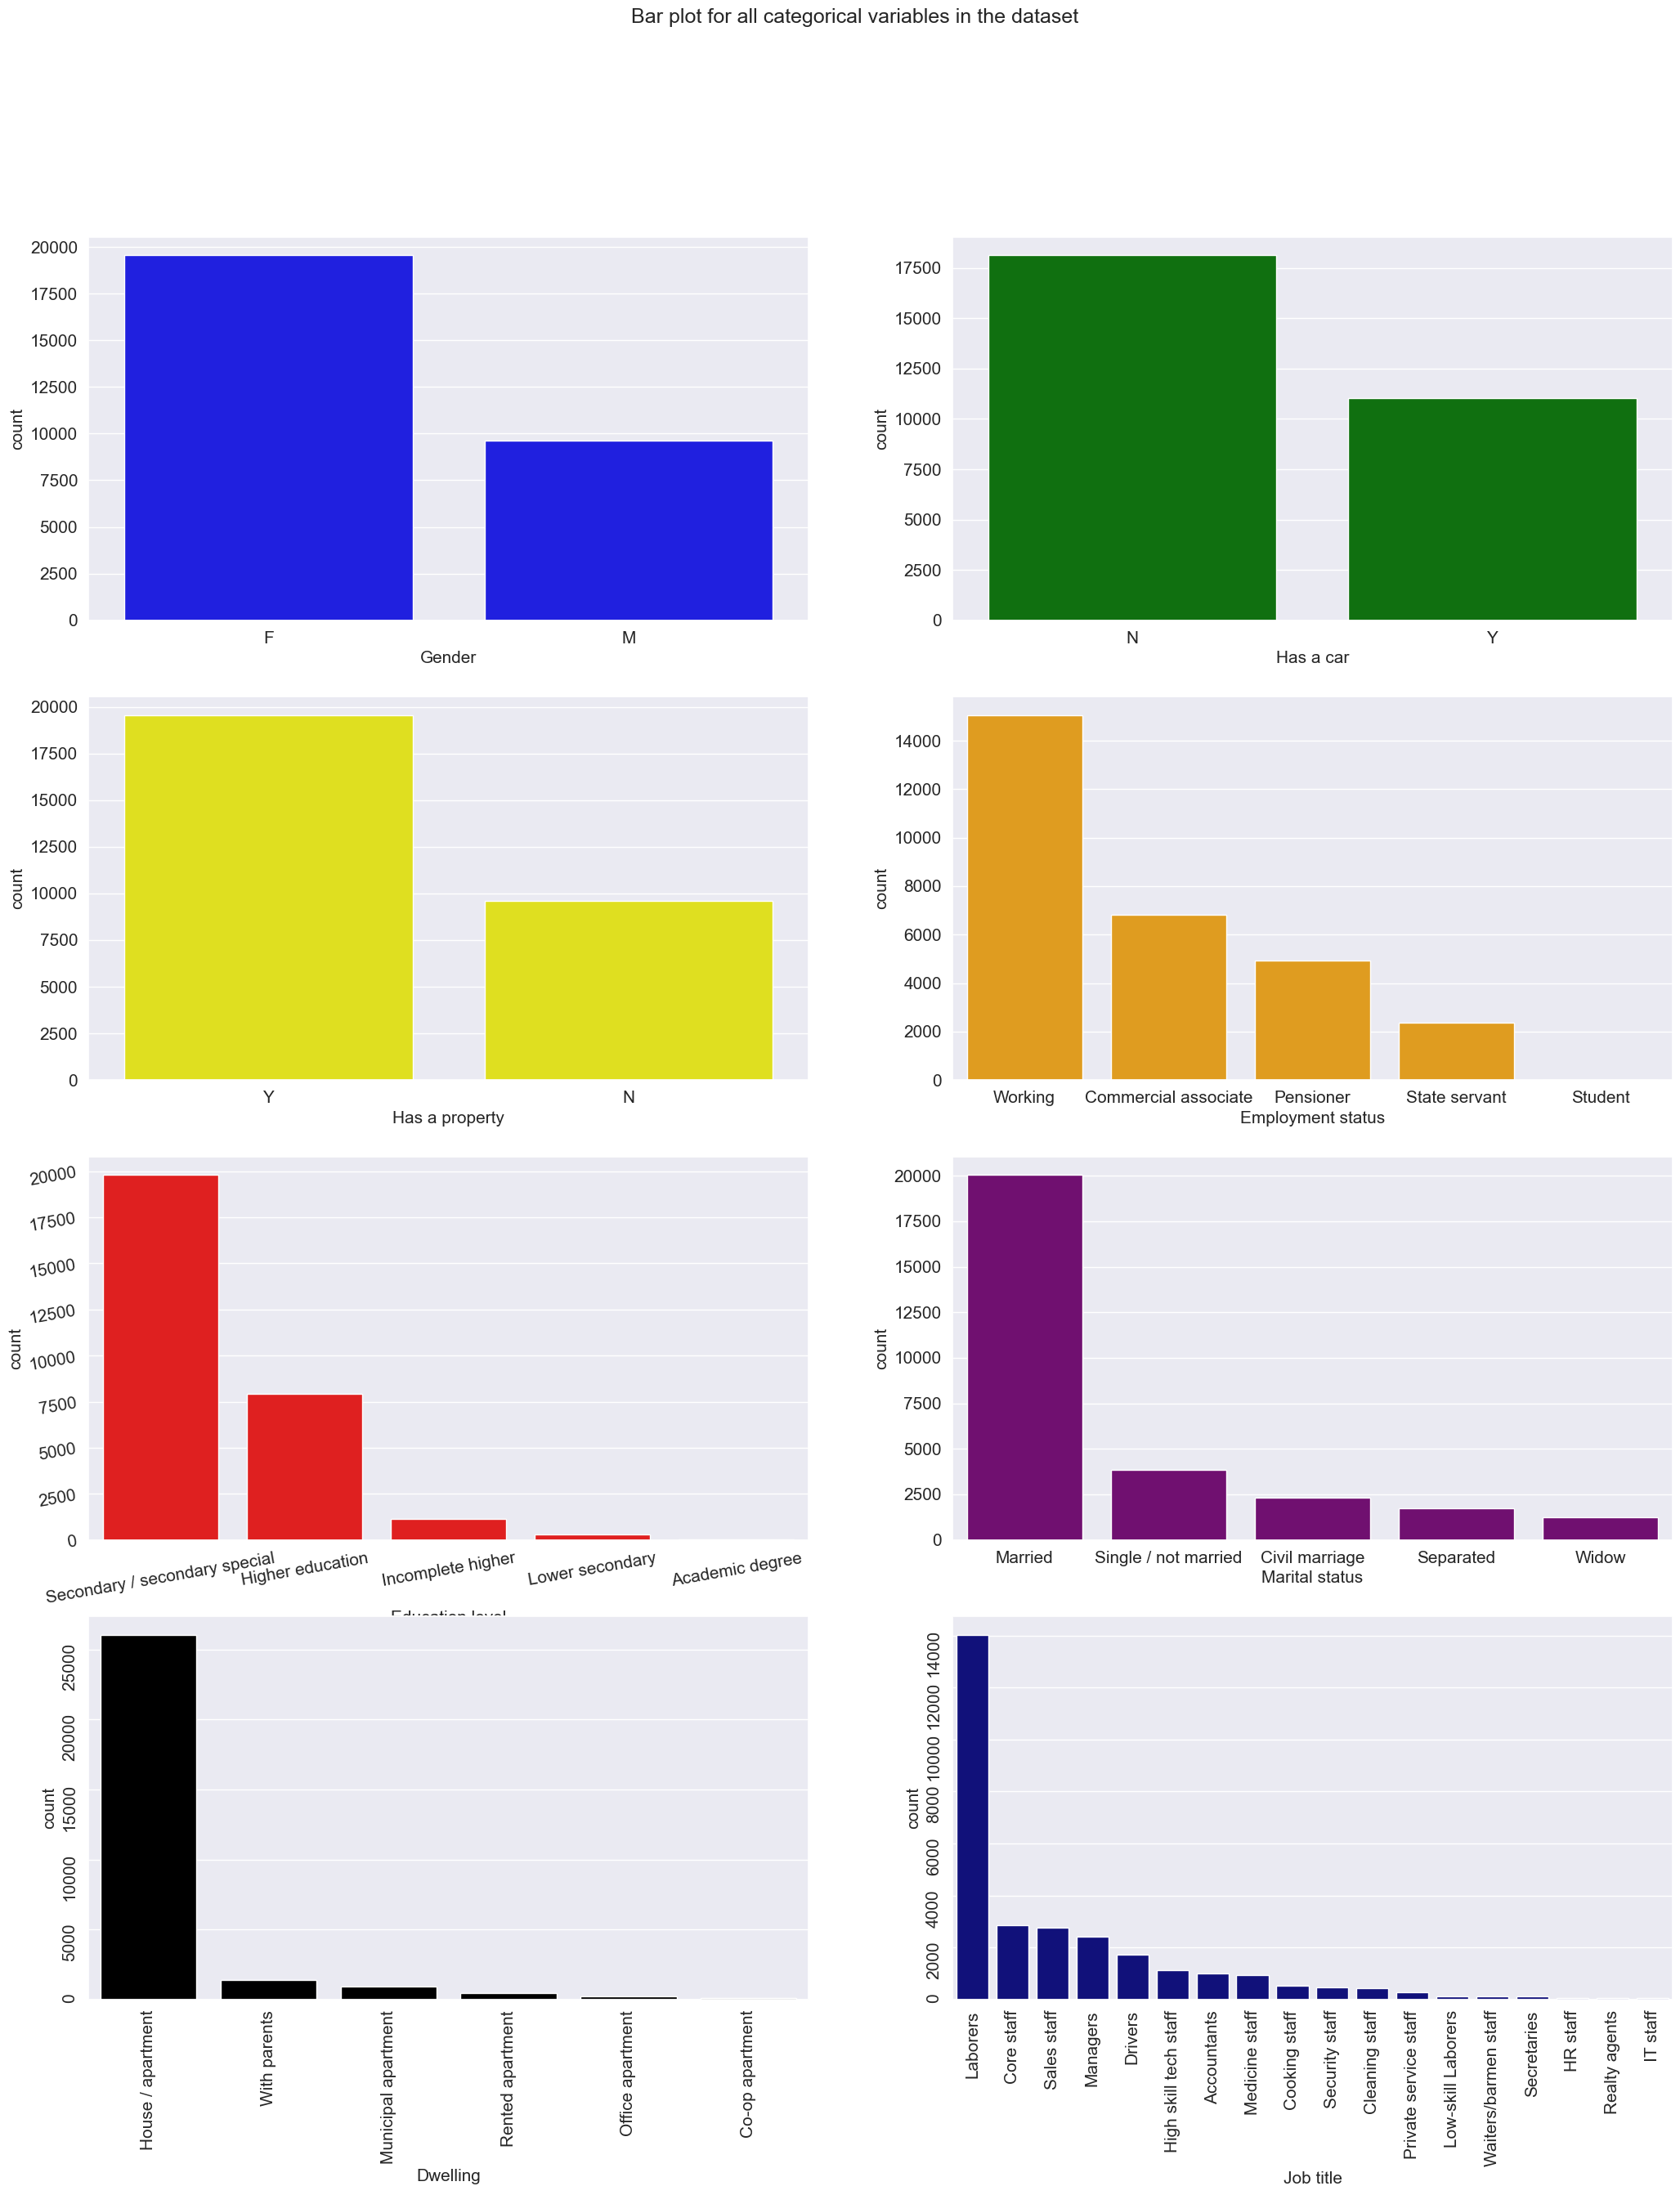

In [63]:
# Create histograms for the categorical features 
fig, axes = plt.subplots(4, 2, figsize=(25, 28))
fig.suptitle('Bar plot for all categorical variables in the dataset')

sns.countplot(ax=axes[0, 0], x='Gender', data=data, color='blue', order=data['Gender'].value_counts().index)
sns.countplot(ax=axes[0, 1], x='Has a car', data=data, color='green', order=data['Has a car'].value_counts().index)
sns.countplot(ax=axes[1, 0], x='Has a property', data=data, color='yellow', order=data['Has a property'].value_counts().index)
sns.countplot(ax=axes[1, 1], x='Employment status', data=data, color='orange', order=data['Employment status'].value_counts().index)
sns.countplot(ax=axes[2, 0], x='Education level', data=data, color='red', order=data['Education level'].value_counts().index)
sns.countplot(ax=axes[2, 1], x='Marital status', data=data, color='purple', order=data['Marital status'].value_counts().index)
sns.countplot(ax=axes[3, 0], x='Dwelling', data=data, color='black', order=data['Dwelling'].value_counts().index)
sns.countplot(ax=axes[3, 1], x='Job title', data=data, color='darkblue', order=data['Job title'].value_counts().index)

axes[2, 0].tick_params(labelrotation=10)
axes[3, 0].tick_params(labelrotation=90)
axes[3, 1].tick_params(labelrotation=90)

plt.show()

Insights:

- In the "Gender" category, females outnumber more than males. The count exceeds 17,500.

- In the "Has a car" category, the majority of people don't own a car. Approximately 17,500 people do not have a car.

- In the "Has a property" category, most people own property. The count of property owners surpasses 17,500.

- Regarding "Employment status," the majority are employed, and there is no one classified as a student.

- In the "Education level" category, 17,500 individuals have completed secondary or secondary special education. Among them,       7,500 people have attained higher education.

- In the "Marital status" category, most individuals are married, while over 2,500 people are single or not married.

- Concerning "Dwelling" category, the majority reside in houses/apartments, with less than 5,000 people living with their parents.

- In the "Job title" category, the majority of employees are laborers, totaling around 14,000 people. This category does not       include HR staff, realty agents, and IT staff.

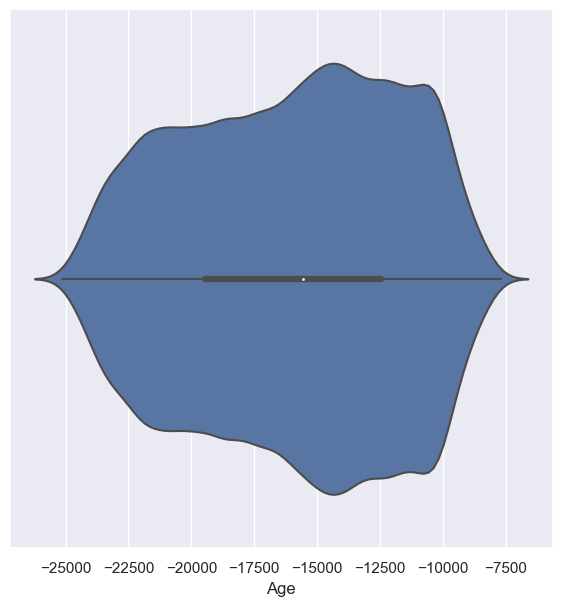

In [64]:
# showing age analysis using violin plot 
plt.figure(figsize=(7,7))
sns.set_theme(style="darkgrid")
sns.violinplot(x=data["Age"])
plt.show()

In [65]:
# Percent count of Gender with Age

print("\033[1m\nPercent count of Gender with Age:")
pd.crosstab(data["Age"], data["Gender"], margins=True)


Percent count of Gender with Age:


Gender,F,M,All
Age,,,
-25152,0,1,1
-25140,3,0,3
-25099,1,0,1
-25088,1,0,1
-25010,0,2,2
...,...,...,...
-7959,2,0,2
-7757,3,0,3
-7723,0,1,1


Insights:
    
 -   The total number of people is 29165 . Nine 9616 of them males and 19549 are females.

# Employment status vs Job title 

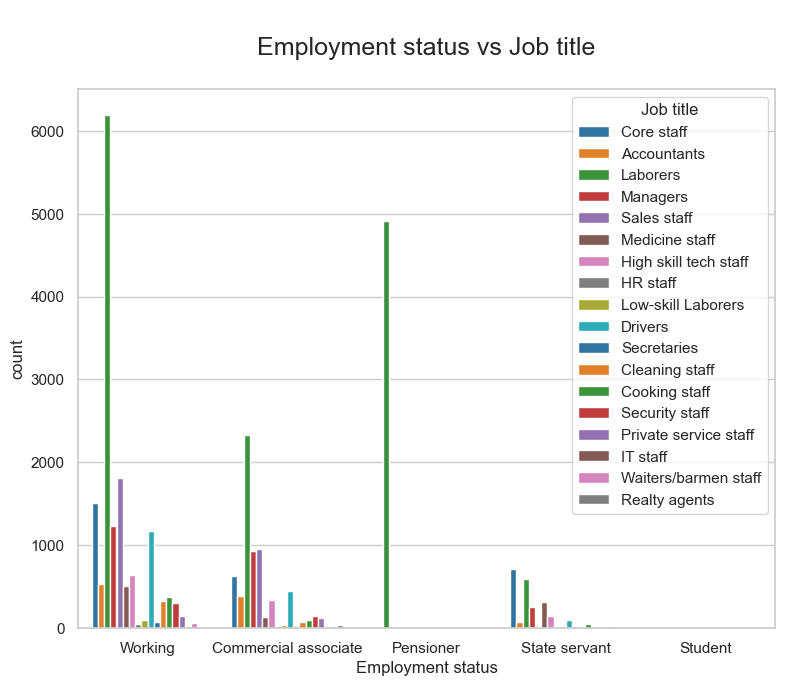

In [128]:
## To plot the graph Employment status vs Job title 
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.figure(figsize=(9,7))
sns.countplot(x=data['Employment status'],hue= data["Job title"],palette='tab10')
plt.title("\nEmployment status vs Job title\n",fontsize=18)
plt.show()

Insights:
  -   Laborers are the most working employees.
  -   Second ,there are more sales staff in commercial associates than the Private service staff.
  -   There is only Laborers in Pensioner.
  -   There are no students.

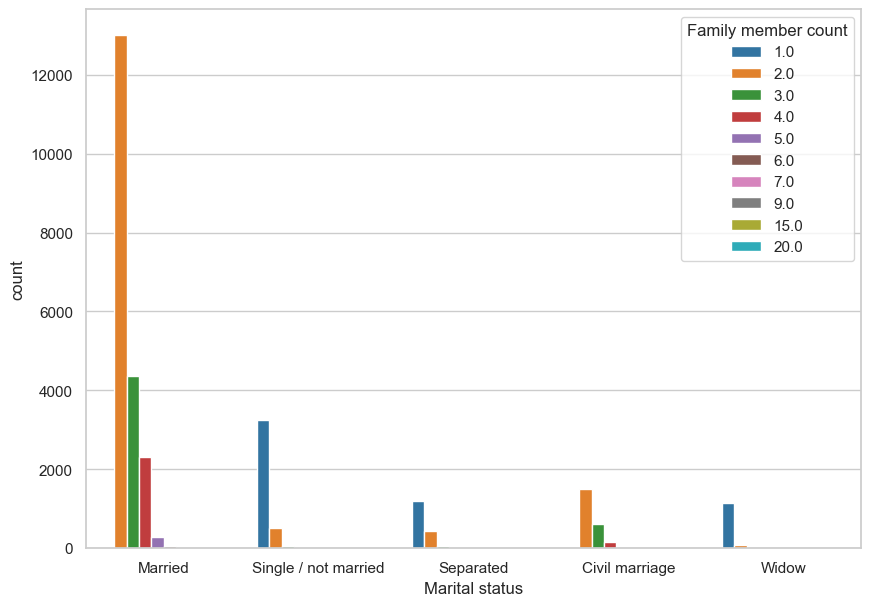

In [67]:
## Plotting the graph for Marital Status
plt.figure(figsize=(10,7))
ax = sns.countplot(x=data['Marital status'],hue= data["Family member count"],palette='tab10')

Insights:

- In married There are more than 12000 couples.
- In married there are more than 4000 family which consist of three peoples.

# Has a mobile phone  vs Has a work phone

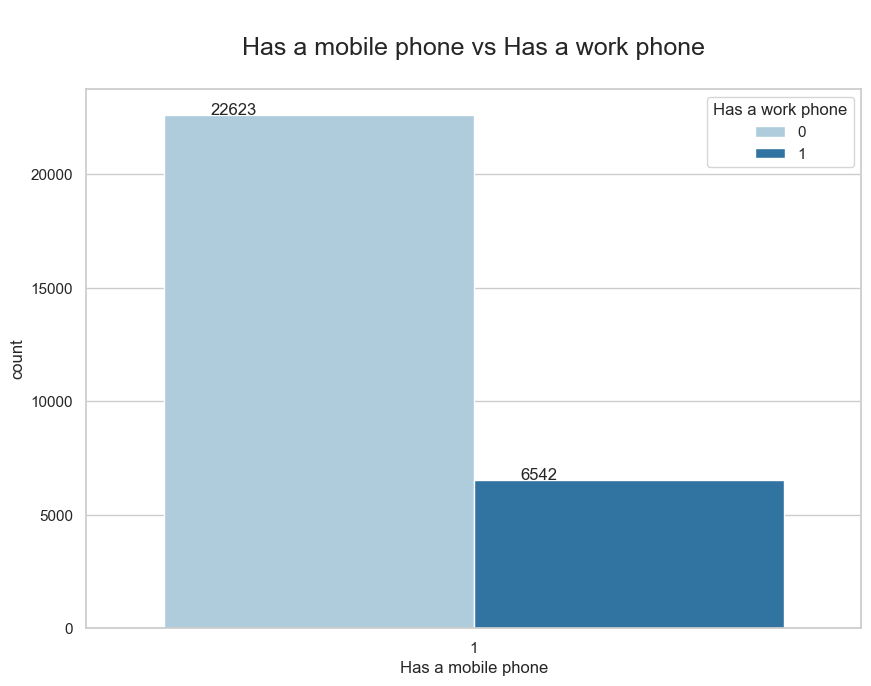

In [68]:
## To plot the graph Has a mobile phone  vs Has a work phone

plt.figure(figsize=(10,7))
ax = sns.countplot(x=data['Has a mobile phone'],hue= data["Has a work phone"],palette='Paired')
plt.title("\nHas a mobile phone vs Has a work phone\n",fontsize=18)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+2))
plt.show()

Insights:
- Almost all of them have a mobile.Around 6542 have Has a work phone.

# Dwelling vs Family member count

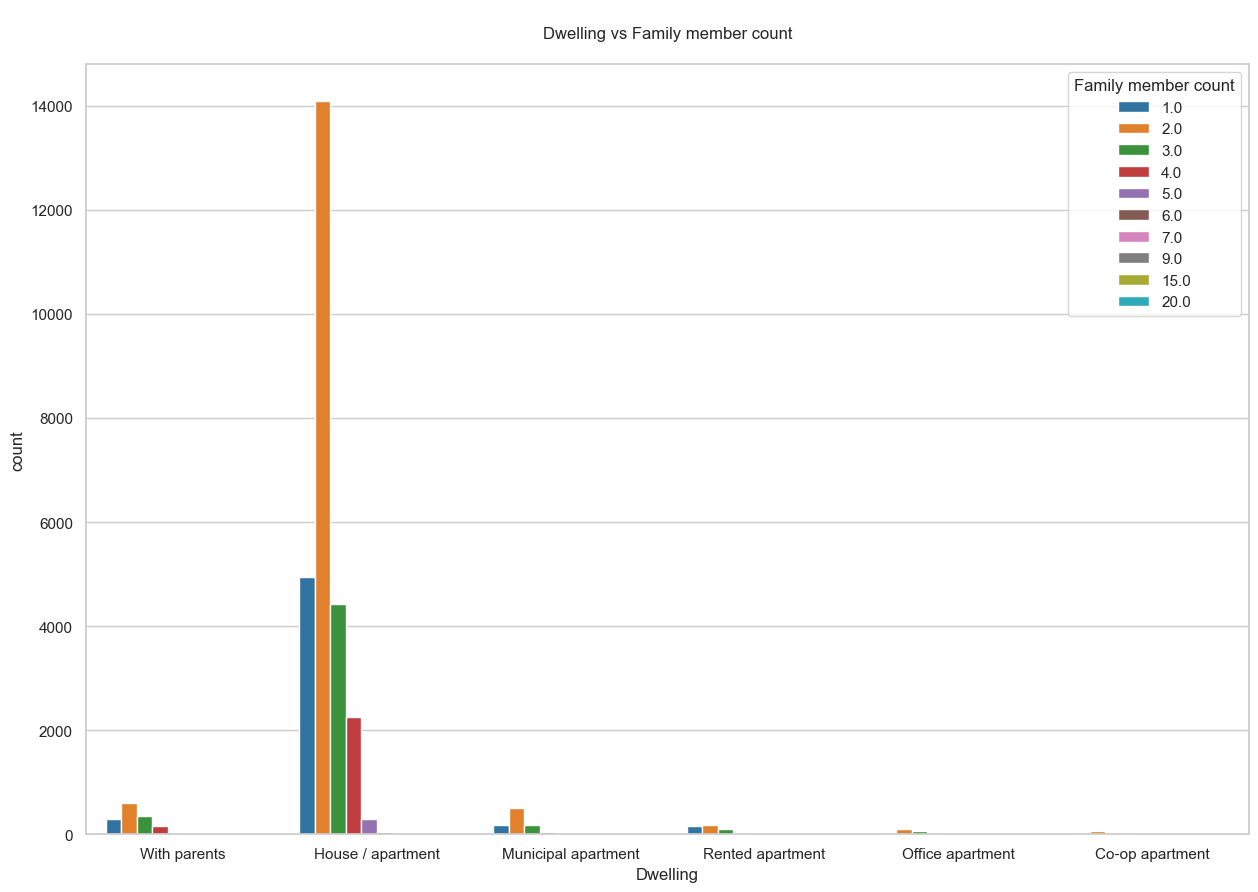

In [69]:
#Plotting the graph for Dwelling vs Fmily member count
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.countplot(x=data["Dwelling"],hue= data['Family member count'],palette='tab10')
plt.title("\nDwelling vs Family member count\n")
#plt.legend(bbox_to_anchor=(1.0, 0.9))
plt.show()

Insights:
- Most dwellings house only two-member families, comprising about 14,000 people.
- In contrast, there are houses/apartments where only one person resides.

# Has a car vs Has a property

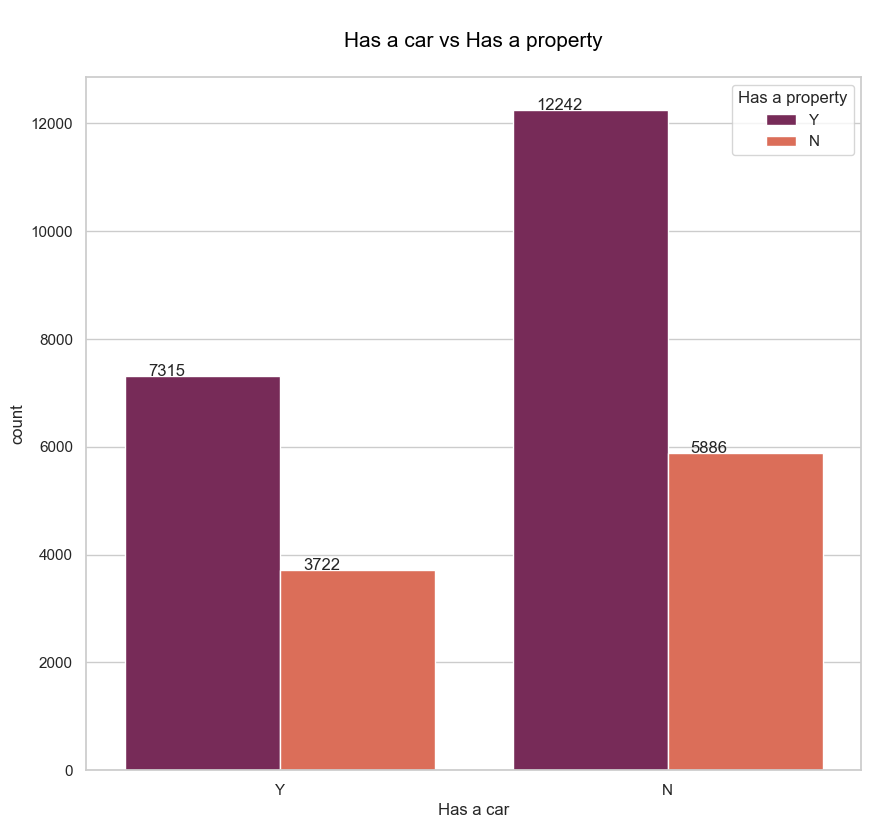

In [70]:
# plotting the graph by Has a car vs Has a property
import matplotlib.pyplot as plt
plt.figure(figsize=(10,9))
ax = sns.countplot(x=data['Has a car'],hue= data["Has a property"],palette='rocket')
plt.title("\nHas a car vs Has a property\n",fontsize=15,color='black')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+2))
plt.show()

Insights:
- Those without cars own the most property.

# Correlation with target variable

In [71]:
#checking uniqueness
for i in df.columns:
    print("Number of unique values :", len(df[i].unique()))
    print(f"{i} is unique: {df[i].is_unique}")
    print("***************************")

Number of unique values : 29165
ID is unique: True
***************************
Number of unique values : 9
Children count is unique: False
***************************
Number of unique values : 82
Income is unique: False
***************************
Number of unique values : 6794
Age is unique: False
***************************
Number of unique values : 3483
Employment length is unique: False
***************************
Number of unique values : 1
Has a mobile phone is unique: False
***************************
Number of unique values : 2
Has a work phone is unique: False
***************************
Number of unique values : 2
Has a phone is unique: False
***************************
Number of unique values : 2
Has an email is unique: False
***************************
Number of unique values : 2
Family member count is unique: False
***************************
Number of unique values : 61
Account age is unique: False
***************************
Number of unique values : 2
Is high risk is un

Insights:
- All values in the "ID" column are unique, indicating that each record in the dataset corresponds to a distinct individual.
- The "Has a mobile phone" column has only one unique value.
- This suggests that all individuals in the dataset possess a mobile phone, as there is no variation in this feature.
- The reason of this we will drop the both  columns.

In [72]:
#dropping "ID" and "Has a mobile phone"
df.drop(["ID","Has a mobile phone"], axis =1, inplace = True)

In [73]:
df.columns

Index(['Children count', 'Income', 'Age', 'Employment length',
       'Has a work phone', 'Has a phone', 'Has an email',
       'Family member count', 'Account age', 'Is high risk', 'Gender',
       'Has a car', 'Has a property', 'Employment status', 'Education level',
       'Marital status', 'Dwelling', 'Job title'],
      dtype='object')

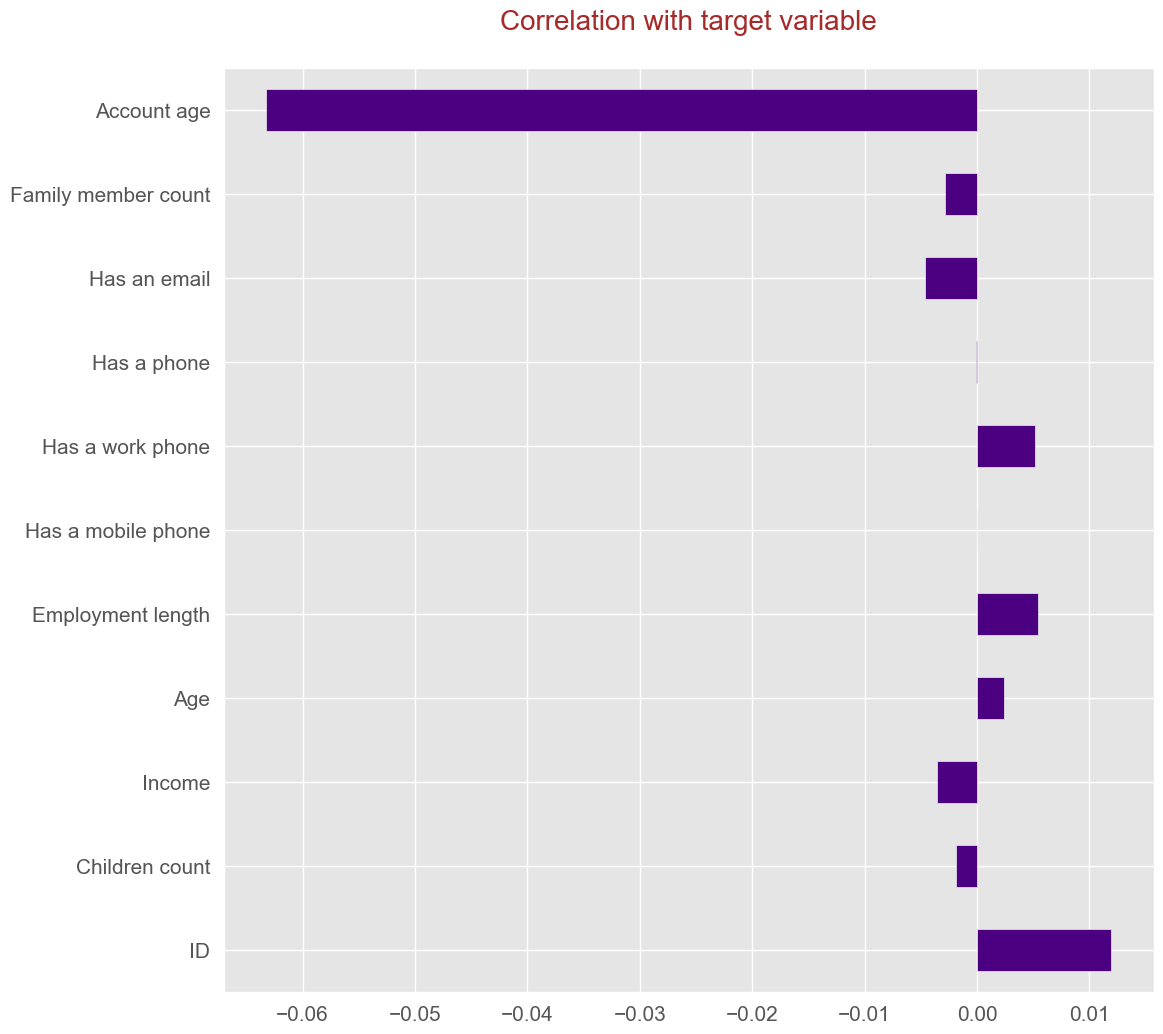

In [74]:
# Select only numeric columns in X``````````````
numeric_columns_X = X.select_dtypes(include=['float64', 'int64'])

# Calculate correlation with y for selected numeric columns
correlation_values = numeric_columns_X.corrwith(y)

# Plotting
plt.style.use('ggplot')
ax = correlation_values.plot(kind='barh', grid=True, figsize=(12, 12), color='indigo')
plt.title("Correlation with target variable\n", size=20, color="brown")
plt.xticks(size=15)
plt.yticks(size=15)
ax.xaxis.label.set_color('blue')
ax.yaxis.label.set_color('brown')
plt.show()

Insights:

- No feature has higher correlation with the target variable. 
- the maximum correlation with target variable is 0.01 and it's the "ID" feature.
- The minimum correlation is with the "Account age" and is -0.06

# Correlation of heat map

- Correlation is a statistical measure that expresses the extent to which two variables are linearly related (means they change together at a constant rate).

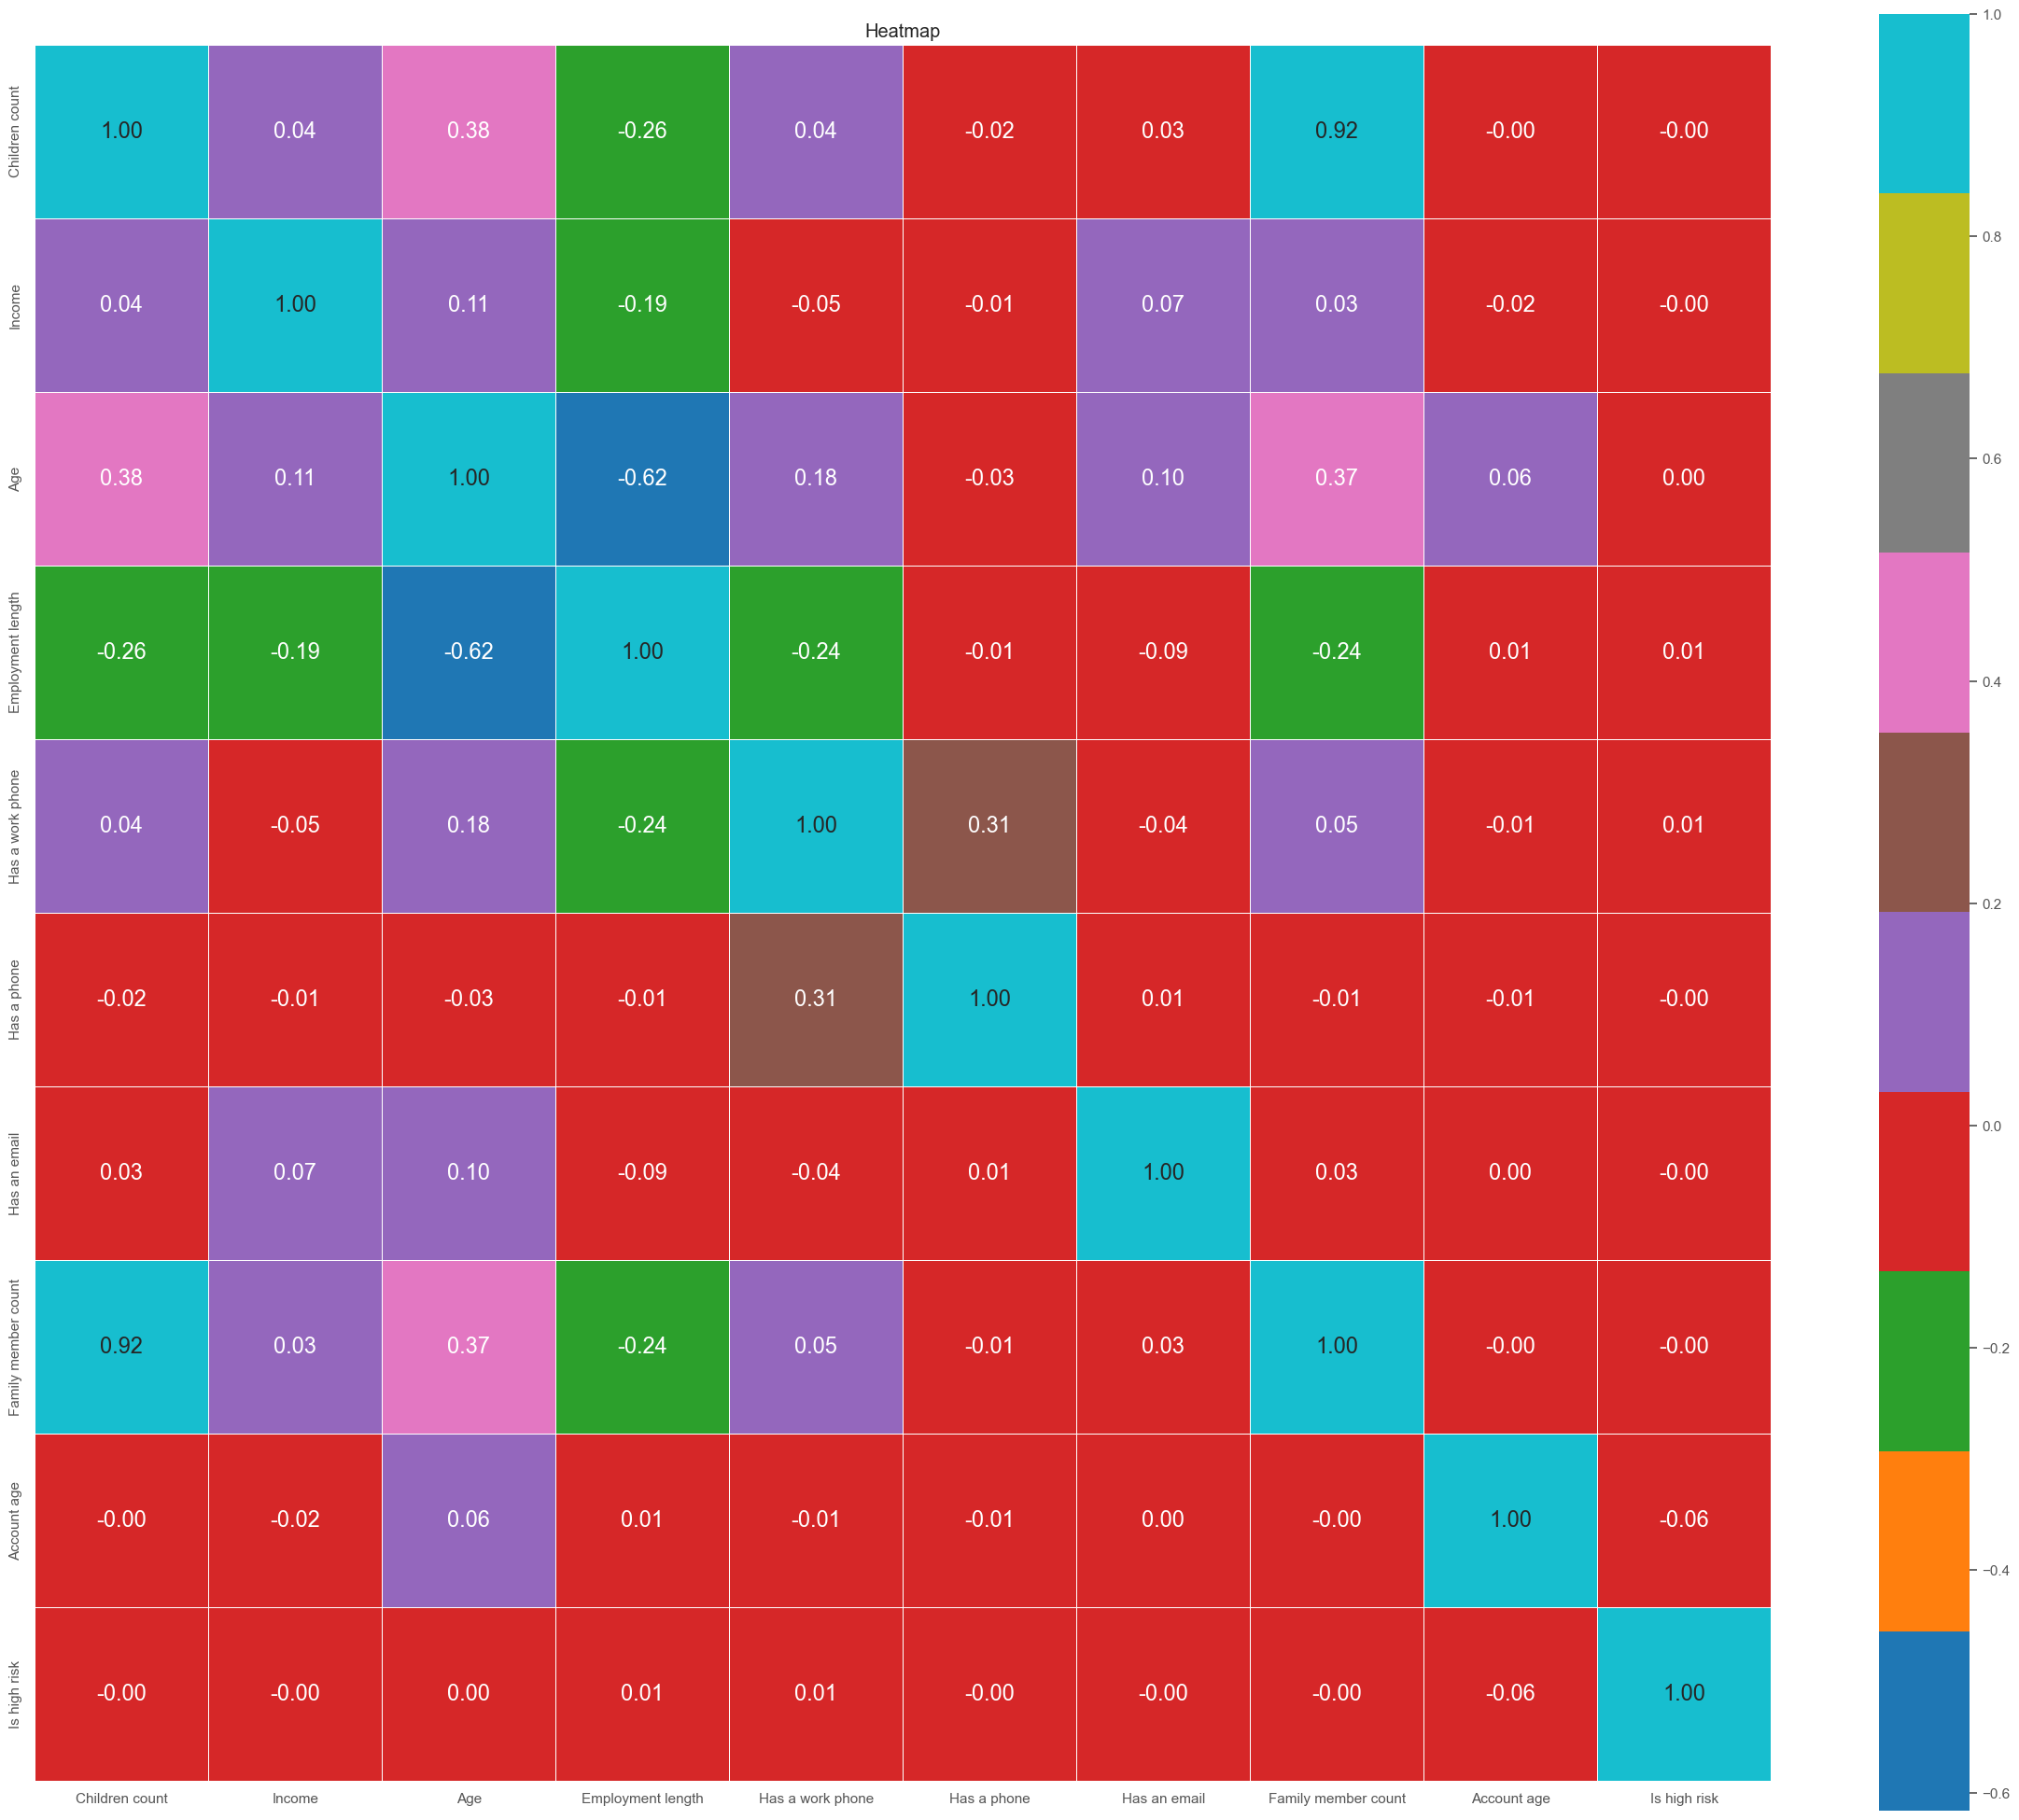

In [75]:
import seaborn as sns

# Select only numeric columns in emp1
numeric_columns_data = df.select_dtypes(include=['float64', 'int64'])

# Create a heatmap of the correlation matrix of selected numeric columns
plt.figure(figsize=(30, 25))
plt.title('Heatmap')
sns.despine()
sns.heatmap(numeric_columns_data.corr(), linewidths=0.6, annot=True, annot_kws={'size':17}, square=True, fmt='.2f', cmap='tab10', )
plt.show()

Insights:
- Here the columns of 'children count' and 'family member count' are more  positively correlated with 'Is high risk" (Target variable) 
- So we dropping one of these two columns.

In [76]:
#dropping  children count
df.drop(["Children count"], axis =1, inplace = True)

In [77]:
df.columns

Index(['Income', 'Age', 'Employment length', 'Has a work phone', 'Has a phone',
       'Has an email', 'Family member count', 'Account age', 'Is high risk',
       'Gender', 'Has a car', 'Has a property', 'Employment status',
       'Education level', 'Marital status', 'Dwelling', 'Job title'],
      dtype='object')

# Feature Selection

In [78]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# Assuming X_smote contains  feature matrix and y_smote contains  target variable

# Scale features to be non-negative
scaler = MinMaxScaler()
X_smote_scaled = scaler.fit_transform(X_smote)

# Select the best k features using chi2
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X_smote_scaled, y_smote)

# Create a DataFrame to display feature names and their scores
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_smote.columns)
featurescores = pd.concat([dfcolumns, dfscores], axis=1)
featurescores.columns = ['feature_names', 'Scores']

print(f"\033[32m{featurescores.nlargest(5, 'Scores')}")

        feature_names      Scores
10                Age  535.071912
13   Has a work phone  206.094224
11  Employment length  131.443403
16          Job title   73.618079
0                  ID   28.336504


Insights:

- From Feature Selection Technique. We get Top 5 features which effect the Target variable Is high risk.

- Account age
- Has a property
- Gender
- Marital status
- ID

# Model Creation And Selection

In [79]:
# Define X with specific columns from X_over as predictor variables
X = X_smote[['Gender', 'Has a car', 'Has a property', 'Children count',
       'Income', 'Employment status', 'Education level', 'Marital status',
       'Dwelling', 'Age', 'Employment length', 'Has a mobile phone',
       'Has a work phone', 'Has a phone', 'Has an email', 'Job title',
       'Family member count', 'Account age']]

# Define y as the target variable from y_over
y = y_smote

# Training the Data

In [80]:
# splitting Train data and Test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.20)
X_train.shape ,X_test.shape ,y_train.shape ,y_test.shape

((45865, 18), (11467, 18), (45865,), (11467,))

# Feature Scaling

In [81]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
# Making predictions on training and testing sets
y_predict_train = rf.predict(X_train)
y_predict_test = rf.predict(X_test)

In [83]:
# Evaluating the model
print(f"\033[1mTraining Accuracy score: {round(accuracy_score(y_train, y_predict_train) * 100, 2)} %\n")
print(f"Testing Accuracy score: {round(accuracy_score(y_test, y_predict_test) * 100, 2)} %\n")
print("Classification Report\n")
print(classification_report(y_test, y_predict_test))

Training Accuracy score: 99.92 %

Testing Accuracy score: 94.96 %

Classification Report

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      5644
         1.0       1.00      0.90      0.95      5823

    accuracy                           0.95     11467
   macro avg       0.95      0.95      0.95     11467
weighted avg       0.95      0.95      0.95     11467



# XGB Classifier

In [84]:
from xgboost import XGBClassifier
ab = XGBClassifier()
y_train_adjusted = y_train - min(y_train)
ab.fit(X_train,y_train_adjusted)
# Making predictions on training and testing sets
ab_pred_train = ab.predict(X_train)
ab_pred_test = ab.predict(X_test)

In [85]:
# Adjusting predictions back to the original scale
ab_pred_train_original = ab_pred_train + min(y_train)
ab_pred_test_original = ab_pred_test + min(y_train)

In [86]:
#Evaluating the model
print(f"\033[1mTraining Accuracy score: {round(accuracy_score(y_train, ab_pred_train_original) * 100, 2)} %\n")
print(f"Testing Accuracy score: {round(accuracy_score(y_test, ab_pred_test_original) * 100, 2)} %\n")
print("Classification Report\n")
print(classification_report(y_test, ab_pred_test_original))

Training Accuracy score: 98.92 %

Testing Accuracy score: 57.15 %

Classification Report

              precision    recall  f1-score   support

         0.0       0.53      0.99      0.69      5644
         1.0       0.94      0.17      0.28      5823

    accuracy                           0.57     11467
   macro avg       0.74      0.58      0.49     11467
weighted avg       0.74      0.57      0.49     11467



 # Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression
# Initializing and training the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [88]:
# Making predictions on training and testing sets
logreg_predictions_train = logreg_model.predict(X_train)
logreg_predictions_test = logreg_model.predict(X_test)
# Evaluating the model
print(f"\033[1mTraining Accuracy score: {round(accuracy_score(y_train, logreg_predictions_train) * 100, 2)} %\n")
print(f"Testing Accuracy score: {round(accuracy_score(y_test, logreg_predictions_test) * 100, 2)} %\n")
print("Classification Report\n")
print(classification_report(y_test, logreg_predictions_test))

Training Accuracy score: 61.05 %

Testing Accuracy score: 60.74 %

Classification Report

              precision    recall  f1-score   support

         0.0       0.60      0.63      0.61      5644
         1.0       0.62      0.59      0.60      5823

    accuracy                           0.61     11467
   macro avg       0.61      0.61      0.61     11467
weighted avg       0.61      0.61      0.61     11467



# KNN

In [89]:
# using k-Nearest Neighbors (KNN) 
from sklearn.neighbors import KNeighborsClassifier
# Initializing the KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Training the model
knn_model.fit(X_train, y_train)

# Making predictions on training and testing sets
knn_pred_train = knn_model.predict(X_train)
knn_pred_test = knn_model.predict(X_test)

In [90]:
# Evaluating the model
print(f"\033[1mTraining Accuracy score: {round(accuracy_score(y_train, knn_pred_train) * 100, 2)} %\n")
print(f"Testing Accuracy score: {round(accuracy_score(y_test, knn_pred_test) * 100, 2)} %\n")
print("Classification Report\n")
print(classification_report(y_test, knn_pred_test))

Training Accuracy score: 98.46 %

Testing Accuracy score: 97.83 %

Classification Report

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      5644
         1.0       0.96      1.00      0.98      5823

    accuracy                           0.98     11467
   macro avg       0.98      0.98      0.98     11467
weighted avg       0.98      0.98      0.98     11467



# Extra Trees Classifier

In [93]:
# using Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
# Initializing the ExtraTreesClassifier
extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Training the model
extra_trees_model.fit(X_train, y_train)

# Making predictions on training and testing sets
extra_trees_pred_train = extra_trees_model.predict(X_train)
extra_trees_pred_test = extra_trees_model.predict(X_test)

In [95]:
# Evaluating the model
print(f"\033[1mTraining Accuracy score: {round(accuracy_score(y_train, extra_trees_pred_train) * 100, 2)} %\n")
print(f"Testing Accuracy score: {round(accuracy_score(y_test, extra_trees_pred_test) * 100, 2)} %\n")
print("Classification Report\n")
print(classification_report(y_test, extra_trees_pred_test))

Training Accuracy score: 99.92 %

Testing Accuracy score: 99.33 %

Classification Report

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      5644
         1.0       0.99      0.99      0.99      5823

    accuracy                           0.99     11467
   macro avg       0.99      0.99      0.99     11467
weighted avg       0.99      0.99      0.99     11467



#  ANN Using MLPClassifier

In [96]:
# using MLPClassifier from scikit-learn for an Artificial Neural Network (ANN):
from sklearn.neural_network import MLPClassifier
# Initializing the MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Training the model
mlp_model.fit(X_train, y_train)

# Making predictions on training and testing sets
mlp_pred_train = mlp_model.predict(X_train)
mlp_pred_test = mlp_model.predict(X_test)

In [97]:
# Evaluating the model
print(f"\033[1mTraining Accuracy score: {round(accuracy_score(y_train, mlp_pred_train) * 100, 2)} %\n")
print(f"Testing Accuracy score: {round(accuracy_score(y_test, mlp_pred_test) * 100, 2)} %\n")
print("Classification Report\n")
print(classification_report(y_test, mlp_pred_test))

Training Accuracy score: 99.01 %

Testing Accuracy score: 98.21 %

Classification Report

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      5644
         1.0       0.97      0.99      0.98      5823

    accuracy                           0.98     11467
   macro avg       0.98      0.98      0.98     11467
weighted avg       0.98      0.98      0.98     11467



# BaggingClassifier with DecisionTreeClassifier

In [98]:
#  BaggingClassifier is used with a base model of DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# Initializing the base model (Decision Tree in this case)
base_model = DecisionTreeClassifier()

# Initializing and training the BaggingClassifier model
bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

# Making predictions on training and testing sets
bagging_pred_train = bagging_model.predict(X_train)
bagging_pred_test = bagging_model.predict(X_test)

In [99]:
# Evaluating the model
print(f"\033[1mTraining Accuracy score: {round(accuracy_score(y_train, bagging_pred_train) * 100, 2)} %\n")
print(f"Testing Accuracy score: {round(accuracy_score(y_test, bagging_pred_test) * 100, 2)} %\n")
print("Classification Report\n")
print(classification_report(y_test, bagging_pred_test))

Training Accuracy score: 99.91 %

Testing Accuracy score: 74.91 %

Classification Report

              precision    recall  f1-score   support

         0.0       0.66      1.00      0.80      5644
         1.0       0.99      0.51      0.67      5823

    accuracy                           0.75     11467
   macro avg       0.83      0.75      0.73     11467
weighted avg       0.83      0.75      0.73     11467



# Support Vector Machines

In [100]:
from sklearn.svm import SVC
# Initializing and training the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [101]:
# Making predictions on training and testing sets
svm_predictions_train = svm_model.predict(X_train)
svm_predictions_test = svm_model.predict(X_test)

In [102]:
# Evaluating the model
print(f"\033[1mTraining Accuracy score: {round(accuracy_score(y_train, svm_predictions_train) * 100, 2)} %\n")
print(f"Testing Accuracy score: {round(accuracy_score(y_test, svm_predictions_test) * 100, 2)} %\n")
print("Classification Report\n")
print(classification_report(y_test, svm_predictions_test))

Training Accuracy score: 89.7 %

Testing Accuracy score: 89.66 %

Classification Report

              precision    recall  f1-score   support

         0.0       0.95      0.83      0.89      5644
         1.0       0.85      0.96      0.90      5823

    accuracy                           0.90     11467
   macro avg       0.90      0.90      0.90     11467
weighted avg       0.90      0.90      0.90     11467



# Model Comparison

In [126]:
from prettytable import PrettyTable
pt = PrettyTable()
pt.field_names = ['Model','Training Accuracy','Testing Acccuracy']
pt.add_row(['Random Forest Classifier','99%','95%'])
pt.add_row(['XGB Classifier','98%','53%'])
pt.add_row(['Logistic Regression','61%','60%'])
pt.add_row(['KNN','98%','97%'])
pt.add_row(['Extra Trees Classifier','99%','99%'])
pt.add_row(['ANN Using MLPClassifier','99%','98%'])
pt.add_row(['BaggingClassifier with DecisionTreeClassifier','99%','74%'])
pt.add_row(['Support Vector Machines','89%','89%'])
print(pt)

+-----------------------------------------------+-------------------+-------------------+
|                     Model                     | Training Accuracy | Testing Acccuracy |
+-----------------------------------------------+-------------------+-------------------+
|            Random Forest Classifier           |        99%        |        95%        |
|                 XGB Classifier                |        98%        |        53%        |
|              Logistic Regression              |        61%        |        60%        |
|                      KNN                      |        98%        |        97%        |
|             Extra Trees Classifier            |        99%        |        99%        |
|            ANN Using MLPClassifier            |        99%        |        98%        |
| BaggingClassifier with DecisionTreeClassifier |        99%        |        74%        |
|            Support Vector Machines            |        89%        |        89%        |
+---------

Insights:

 ###### Based on the provided accuracy results

 - The Extra Trees Classifier(Training Accuracy - 99% /   Testing Acccuracy - 95%) and the ANN using MLPClassifier(Training 
   Accuracy-98%,Testing Acccuracy - 97% )seem to perform exceptionally well on this dataset, while some other models like XGB   
   Classifier and BaggingClassifier with DecisionTreeClassifier show signs of overfitting or a mismatch with the data.
   


# Importing Test Data

In [104]:
#Loding Test Data set
testdata = pd.read_csv("test_data.csv")

In [105]:
testdata.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0


In [106]:
testdata.tail(5)

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
7287,5115415,F,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-21724,-1351,1,0,0,0,NaN,2.0,-22.0,0
7288,5068826,F,Y,Y,0,157500.0,Working,Higher education,Married,House / apartment,-14976,-3550,1,0,0,1,Drivers,2.0,-42.0,0
7289,5026088,F,N,Y,0,67500.0,Working,Secondary / secondary special,Widow,House / apartment,-20482,-5030,1,1,1,0,NaN,1.0,-25.0,0
7290,5142701,F,Y,N,0,95850.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18931,-6678,1,1,0,0,Laborers,2.0,-49.0,0
7291,5022903,F,N,Y,1,135000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-10765,-2196,1,0,0,1,NaN,3.0,-36.0,0


# Basic Checks

In [107]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7292 non-null   int64  
 1   Gender               7292 non-null   object 
 2   Has a car            7292 non-null   object 
 3   Has a property       7292 non-null   object 
 4   Children count       7292 non-null   int64  
 5   Income               7292 non-null   float64
 6   Employment status    7292 non-null   object 
 7   Education level      7292 non-null   object 
 8   Marital status       7292 non-null   object 
 9   Dwelling             7292 non-null   object 
 10  Age                  7292 non-null   int64  
 11  Employment length    7292 non-null   int64  
 12  Has a mobile phone   7292 non-null   int64  
 13  Has a work phone     7292 non-null   int64  
 14  Has a phone          7292 non-null   int64  
 15  Has an email         7292 non-null   i

In [108]:
#cheking the dataset columns
testdata.columns

Index(['ID', 'Gender', 'Has a car', 'Has a property', 'Children count',
       'Income', 'Employment status', 'Education level', 'Marital status',
       'Dwelling', 'Age', 'Employment length', 'Has a mobile phone',
       'Has a work phone', 'Has a phone', 'Has an email', 'Job title',
       'Family member count', 'Account age', 'Is high risk'],
      dtype='object')

In [109]:
#checking the shape of the dataset
print("No of rows : ",testdata.shape[0])
print("No of columns : ",testdata.shape[0])

No of rows :  7292
No of columns :  7292


In [110]:
#checking the Null values
nvc = pd.DataFrame(testdata.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/testdata.shape[0],3)*100
print(nvc)

                     Total Null Values  Percentage
ID                                   0         0.0
Family member count                  0         0.0
Has an email                         0         0.0
Has a phone                          0         0.0
Has a work phone                     0         0.0
Has a mobile phone                   0         0.0
Employment length                    0         0.0
Age                                  0         0.0
Account age                          0         0.0
Dwelling                             0         0.0
Education level                      0         0.0
Employment status                    0         0.0
Income                               0         0.0
Children count                       0         0.0
Has a property                       0         0.0
Has a car                            0         0.0
Gender                               0         0.0
Marital status                       0         0.0
Is high risk                   

Insights:

   - The "Job title" column stands out with a considerable number of missing values, specifically 2296 instances, representing 31.5% of the data in that column.

# Handling the Null value

In [111]:
# Impute categorical 'Job title ' with mode
testdata['Job title'].fillna(testdata['Job title'].mode()[0], inplace=True)

In [112]:
testdata['Job title'].fillna('Unknown', inplace=True)

In [113]:
testdata.isnull().sum()

ID                     0
Gender                 0
Has a car              0
Has a property         0
Children count         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Age                    0
Employment length      0
Has a mobile phone     0
Has a work phone       0
Has a phone            0
Has an email           0
Job title              0
Family member count    0
Account age            0
Is high risk           0
dtype: int64

Insights:
   - The high number of missing values in the "Job title" column is crucial for ensuring the accuracy and completeness of the dataset.

In [114]:
#Taking care of duplicate values
testdata_dup = testdata.duplicated().any()

In [115]:
testdata_dup

False

Insight:
   - There is no duplicates values.

# Droppping the columns

In [116]:
#dropping "Has a mobile phone"
testdata.drop(["Has a mobile phone"], axis =1, inplace = True)

In [117]:
testdata.columns

Index(['ID', 'Gender', 'Has a car', 'Has a property', 'Children count',
       'Income', 'Employment status', 'Education level', 'Marital status',
       'Dwelling', 'Age', 'Employment length', 'Has a work phone',
       'Has a phone', 'Has an email', 'Job title', 'Family member count',
       'Account age', 'Is high risk'],
      dtype='object')

In [118]:
testdata

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,0,0,0,Laborers,2.0,-48.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,5115415,F,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-21724,-1351,0,0,0,Laborers,2.0,-22.0,0
7288,5068826,F,Y,Y,0,157500.0,Working,Higher education,Married,House / apartment,-14976,-3550,0,0,1,Drivers,2.0,-42.0,0
7289,5026088,F,N,Y,0,67500.0,Working,Secondary / secondary special,Widow,House / apartment,-20482,-5030,1,1,0,Laborers,1.0,-25.0,0
7290,5142701,F,Y,N,0,95850.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18931,-6678,1,0,0,Laborers,2.0,-49.0,0


# Numerical Features

In [119]:
num_testdata = testdata[['ID','Children count','Income','Age','Employment length','Has a work phone','Has a phone','Has an email',
                     'Family member count','Account age','Is high risk']]
num_testdata

,ID,Children count,Income,Age,Employment length,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
0,5091261,0,202500.0,-16834,-1692,0,0,0,1.0,-6.0,0
1,5096963,0,675000.0,-18126,-948,0,1,0,2.0,-16.0,0
2,5087880,0,234000.0,-21967,-5215,0,0,1,2.0,-52.0,0
3,5021949,0,445500.0,-12477,-456,0,0,0,2.0,-54.0,0
4,5105705,0,225000.0,-12155,-667,0,0,0,2.0,-48.0,0
...,...,...,...,...,...,...,...,...,...,...,...
7287,5115415,0,135000.0,-21724,-1351,0,0,0,2.0,-22.0,0
7288,5068826,0,157500.0,-14976,-3550,0,0,1,2.0,-42.0,0
7289,5026088,0,67500.0,-20482,-5030,1,1,0,1.0,-25.0,0
7290,5142701,0,95850.0,-18931,-6678,1,0,0,2.0,-49.0,0


# Categorical Features

In [120]:
# storing object type data in obj_data variable
obj_testdata = testdata.select_dtypes(include="object")
obj_testdata

,Gender,Has a car,Has a property,Employment status,Education level,Marital status,Dwelling,Job title
0,F,N,Y,State servant,Secondary / secondary special,Separated,House / apartment,Medicine staff
1,M,Y,N,Commercial associate,Higher education,Married,House / apartment,Managers
2,F,N,N,State servant,Higher education,Civil marriage,House / apartment,Core staff
3,F,Y,Y,Commercial associate,Higher education,Married,House / apartment,Managers
4,F,Y,N,Working,Secondary / secondary special,Married,Municipal apartment,Laborers
...,...,...,...,...,...,...,...,...
7287,F,Y,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
7288,F,Y,Y,Working,Higher education,Married,House / apartment,Drivers
7289,F,N,Y,Working,Secondary / secondary special,Widow,House / apartment,Laborers
7290,F,Y,N,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers


# Checking for Null/Values

In [121]:
# check for numerical data
num_testdata.isna().sum()

ID                     0
Children count         0
Income                 0
Age                    0
Employment length      0
Has a work phone       0
Has a phone            0
Has an email           0
Family member count    0
Account age            0
Is high risk           0
dtype: int64

In [122]:
#checking for categorical data
obj_testdata.isna().sum()

Gender               0
Has a car            0
Has a property       0
Employment status    0
Education level      0
Marital status       0
Dwelling             0
Job title            0
dtype: int64

# Preprocessing

- To convert categorical columns to numerical columns, we using  label encoding method

# Label Encoding

In [123]:
# Assuming obj_data is your DataFrame
obj_testdata[['Gender', 'Has a car', 'Has a property', 'Employment status',
          'Education level', 'Marital status', 'Dwelling', 'Job title']] = obj_testdata[['Gender', 'Has a car', 'Has a property', 'Employment status',
                                                                                        'Education level', 'Marital status', 'Dwelling', 'Job title']].apply(label.fit_transform)
testdata = pd.concat([num_testdata, obj_testdata], axis=1)

In [124]:
testdata = pd.concat([num_testdata, obj_testdata], axis=1)
testdata

,ID,Children count,Income,Age,Employment length,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk,Gender,Has a car,Has a property,Employment status,Education level,Marital status,Dwelling,Job title
0,5091261,0,202500.0,-16834,-1692,0,0,0,1.0,-6.0,0,0,0,1,2,4,2,1,11
1,5096963,0,675000.0,-18126,-948,0,1,0,2.0,-16.0,0,1,1,0,0,1,1,1,10
2,5087880,0,234000.0,-21967,-5215,0,0,1,2.0,-52.0,0,0,0,0,2,1,0,1,3
3,5021949,0,445500.0,-12477,-456,0,0,0,2.0,-54.0,0,0,1,1,0,1,1,1,10
4,5105705,0,225000.0,-12155,-667,0,0,0,2.0,-48.0,0,0,1,0,4,4,1,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,5115415,0,135000.0,-21724,-1351,0,0,0,2.0,-22.0,0,0,1,1,4,4,1,1,8
7288,5068826,0,157500.0,-14976,-3550,0,0,1,2.0,-42.0,0,0,1,1,4,1,1,1,4
7289,5026088,0,67500.0,-20482,-5030,1,1,0,1.0,-25.0,0,0,0,1,4,4,4,1,8
7290,5142701,0,95850.0,-18931,-6678,1,0,0,2.0,-49.0,0,0,1,0,0,4,1,1,8


# Testing the dataset

In [125]:
from sklearn.metrics import accuracy_score


# Replace 'X_test' and 'y_test' with your actual test data
X_test, y_test = testdata.drop('Is high risk', axis=1, inplace = False), testdata['Is high risk']

# Make predictions on the entire test dataset
y_pred_test = extra_trees_model.predict(X_test)

# Evaluate the model on the entire test dataset
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on the Test Dataset: {test_accuracy}")

Accuracy on the Test Dataset: 0.9839550191991223


# Conclution

##### Project Completion

- The successful development of the credit card approval prediction model marks a significant milestone in leveraging data-driven insights for financial decision-making.

- In this we will import all the necessary files and directories which be required to overform the operation over the database.

- We wiill clean the data, that by removing null values,unknown data, etc . 

- Here we will also perform some operations like encoding data, finding the null values  in the database then removing the data which is not useful for any further operations.

- Perform feature engineering on the data, Applying visualization for better understanding of the data then will model for further predictions.

- After the prediction we get the best model "Extra Trees Classifier", which credit card approval decisions to assist in the decision-making process.

- Then we will import the Test Data , And We will clean the data that by removing null values. Finaly The best model Evaluate and we find the best Accuracy of Test Dataset which is 98.39%

# Recommendations

### Target Marketing Strategies:
- Given the skewed distribution in features like income, family size, and education level, tailor marketing strategies to different segments. For example, design specific credit card offers for higher education individuals or families with larger member counts.

### Gender-Inclusive Products: 
- Since females outnumber males in the dataset, consider developing credit card products that cater to the preferences and needs of women. This can include tailored rewards programs or exclusive offers that resonate with the majority of the audience.

### Car Ownership and Property Ownership Correlation: 
- Recognize the relationship between property ownership and lack of car ownership. Develop credit card products that cater to property owners, potentially offering benefits related to home improvement or property management.

### Employment Status Verification: 
- Given the absence of students and a majority being employed, streamline the credit card approval process by prioritizing employed individuals. Consider developing credit products with features that align with the financial needs of the working population.

### Marital Status and Family Size Impact:
- Acknowledge the prevalence of married individuals and families with specific sizes. Design credit card offerings that address the financial needs of couples or families, such as joint accounts or family-oriented rewards programs.

### Implementing these considerations may lead to a more inclusive and effective credit approval process, reducing the risk and improving the accuracy of credit decisions.